In [1]:
import pandas as pd
import numpy as np
import pyrebase
import sklearn
import re
import urllib.request
import requests
import math
from bs4 import BeautifulSoup
from datetime import datetime
from textblob import TextBlob, Word

In [2]:
#Extracts the query from the Google URL
def getQueryFromURL(googleurl):
    startIndex = googleurl.find('=')
    endIndex = googleurl.find('&')
    if endIndex==-1:
        return re.sub("\+", " ", googleurl[startIndex+1:])
    else:
        return re.sub("\+", " ", googleurl[startIndex+1: endIndex])
    
    
def get_query_autocomplete(googleurl):
    startIndex = googleurl.find('=')
    endIndex = googleurl.find('&')
    queryString = googleurl[startIndex+1: endIndex] if endIndex!=-1 else googleurl[startIndex+1:]
    target_url = 'https://www.google.com/complete/search?q=' + queryString+'+&pq='+queryString+'&client=chrome'
    ##Naive, assuming search query has no brackets
    autocompletesuggestions=''
    for line in urllib.request.urlopen(target_url):
        googleautosugg=line.decode('utf-8')
        startBracket = googleautosugg.index('[', 1)
        endBracket = googleautosugg.index(']', 1)
        autocompletesuggestions = googleautosugg[startBracket+1: endBracket]
    autocompletesuggestions.replace('"', "" )
    return autocompletesuggestions.split(',')

def create_url_from_text(queryUrlString):
    url = 'https://www.google.com/search?q=' +queryUrlString
    return url

def get_site_article(beautifulSoupObj):
    texts = set()
    for link in beautifulSoupObj.find_all('p'):
        texts.add(link.get_text())
    return texts

def scrape_website(url):
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")
    return soup

def setToString(set):
    return '; '.join(set)

def getNParticle(websitedom):
    paragraphs = get_site_article(websitedom)
    paragraphString = setToString(paragraphs)
    blob = TextBlob(paragraphString)
    phrases = cleanPhrases(blob.noun_phrases)
    frequency = {}
    # iterating over the list
    for item in phrases:
        # checking the element in dictionary
        if item == '':
            continue
        if item in frequency:
            # incrementing the count
            frequency[item] += 1
        else:
            # initializing the count
            frequency[item] = 1
    return dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

def cleanPhrases(phrases):
#     for count, phrase in enumerate(phrases):
#         phrases[count] = Word(re.sub("[^a-zA-Z ]+", "", phrase).strip())
    return phrases

client_id = "3074457360917723621"
client_id2="3074457364681072467"
pilotBoards=['o9J_l0_9Oa8=', #AH
             'o9J_l1daiMk=',#GH
             'o9J_l1PIrDQ=', #KL
             'o9J_l2KryjI=', #SZ
             'o9J_l3LlFIA=',
             'o9J_l350Img=',
             'o9J_lzKK_yc=',
             'o9J_luPdtDQ='
            ]

In [3]:
boardInfo=pd.read_csv('boardInfo.csv')
boardInfo=boardInfo.set_index('boardId')
boardInfo=boardInfo.drop(['o9J_lyYiALg=','o9J_lwrV0Y8=', 'o9J_lwrV0RU=', 'o9J_lwrV0c8=', 'o9J_luPdtDQ='])
sidebarBoards=boardInfo[boardInfo['studyType']=='Sidebar']
onboardBoards=boardInfo[boardInfo['studyType']=='On Board']
sidebarBoards

,studyType,topicTask
boardId,,
o9J_lth9DEA=,Sidebar,Space Travel
o9J_lthxoK8=,Sidebar,COVID-19
o9J_lwMyp0I=,Sidebar,COVID-19
o9J_lwT45UE=,Sidebar,COVID-19
o9J_lwTEkh4=,Sidebar,COVID-19
o9J_lwTEnZk=,Sidebar,COVID-19
o9J_lwTHmNo=,Sidebar,COVID-19
o9J_lwTHmtQ=,Sidebar,Space Travel
o9J_lwhnitY=,Sidebar,COVID-19


In [4]:
suggestionCircleClicked_dict=pd.read_csv('suggCircClicked.csv')
suggestionCircleClicked_dict

,o9J_l3LlFIA=,o9J_lth3zkI=,o9J_lthisSs=,o9J_lthxoK8=,o9J_lthxoSw=,o9J_luPdtDQ=,o9J_lwT0kWk=,o9J_lwT45Gc=,o9J_lwTEnSI=,o9J_lwhnitY=,...,o9J_lwtLWq0=,o9J_lwtLZY8=,o9J_lx2--OQ=,o9J_lxPFjOs=,o9J_lxTWUZI=,o9J_ly0SnuI=,o9J_lyGIeLY=,o9J_lyYiALM=,o9J_lzKK_yc=,o9J_lzYurAk=
0,2021-09-06T05:32:37.811671,2021-09-29T21:18:45.969152,2021-09-29T01:51:59.458002,2021-09-30T00:30:10.308079,2021-09-30T01:21:10.844242,2021-09-27T20:48:39.076136,2021-09-17T19:54:25.164725,2021-09-19T18:57:56.388663,2021-09-20T22:12:49.301259,2021-09-14T22:22:28.479815,...,2021-09-16T16:10:37.446423,2021-09-15T19:46:40.357202,2021-09-13T19:21:07.409868,2021-09-13T22:35:24.822507,2021-09-14T18:35:59.152866,2021-09-06T21:31:53.929005,2021-09-07T19:38:13.633187,2021-09-13T16:45:39.070851,2021-09-01T16:15:02.298860,2021-09-03T19:02:11.951766
1,2021-09-06T05:32:53.289714,2021-09-29T21:19:24.902341,2021-09-29T01:51:59.786104,NaN,2021-09-30T01:22:56.818459,2021-09-27T20:59:20.722169,2021-09-17T20:24:03.868339,2021-09-19T18:58:05.109626,2021-09-20T22:12:57.055382,2021-09-14T22:22:51.576317,...,2021-09-16T16:10:49.977227,2021-09-15T19:54:09.495736,2021-09-13T19:21:19.728851,2021-09-13T22:35:45.090042,2021-09-14T18:55:31.076087,2021-09-06T21:32:19.249166,2021-09-07T19:45:24.133647,2021-09-13T16:46:28.735344,2021-09-01T16:18:48.059334,2021-09-03T19:03:04.606178
2,2021-09-06T05:45:20.063838,2021-09-29T21:19:35.624034,2021-09-29T01:51:52.174880,NaN,2021-09-30T01:23:16.372376,NaN,2021-09-17T20:24:09.883425,2021-09-19T18:58:13.697926,2021-09-20T22:13:10.726345,NaN,...,2021-09-16T16:11:01.348810,2021-09-15T19:47:23.174137,2021-09-13T19:27:02.696450,2021-09-13T22:36:29.374655,2021-09-14T18:37:48.505887,2021-09-06T21:32:30.409512,2021-10-01T04:12:32.614285,2021-09-13T17:04:35.732466,2021-09-01T16:14:49.810638,2021-09-03T19:32:29.347889
3,2021-09-06T05:45:47.781514,2021-09-29T21:21:24.652713,NaN,NaN,2021-09-30T01:33:43.428568,NaN,2021-09-17T19:46:03.675895,2021-09-19T19:04:05.851793,2021-09-20T22:13:14.957240,NaN,...,2021-09-16T16:18:12.880288,2021-09-15T19:47:30.035405,2021-09-13T19:20:57.434521,2021-09-13T22:37:34.105670,2021-09-14T18:42:10.650677,2021-09-06T21:14:50.437901,2021-10-01T04:12:47.647622,2021-09-13T16:27:28.073845,2021-09-01T16:18:06.839022,2021-09-03T19:32:36.149804
4,2021-09-06T05:46:06.487105,2021-09-29T21:38:24.087582,NaN,NaN,2021-09-30T01:34:01.021337,NaN,2021-09-17T19:47:02.390048,2021-09-19T19:17:39.367505,2021-09-20T22:46:23.228461,NaN,...,2021-09-16T16:18:33.527968,2021-09-15T19:48:23.495304,2021-09-13T19:32:56.911230,2021-09-13T22:39:31.234650,2021-09-14T18:48:03.328277,2021-09-06T21:23:42.289638,2021-10-01T04:27:06.100831,2021-09-13T17:04:22.297555,2021-09-01T16:14:44.474984,2021-09-03T19:32:52.167853
5,2021-09-06T05:46:23.973338,2021-09-29T21:43:31.046884,NaN,NaN,2021-09-30T02:13:05.526204,NaN,2021-09-17T19:54:05.186198,2021-09-19T19:19:59.844428,2021-09-20T22:19:26.994694,NaN,...,2021-09-16T16:18:58.067952,2021-09-15T19:48:31.483914,2021-09-13T19:28:44.886968,2021-09-13T22:44:52.890950,2021-09-14T18:50:01.322500,2021-09-06T21:31:44.780422,2021-09-07T20:12:27.818038,2021-09-13T16:27:35.530981,2021-09-01T16:19:32.882949,2021-09-03T19:01:49.283553
6,2021-09-06T05:53:51.586293,2021-09-29T21:46:09.094553,NaN,NaN,2021-09-30T02:13:28.903336,NaN,2021-09-17T19:55:12.979441,2021-09-19T19:21:03.811360,2021-09-20T22:24:15.166825,NaN,...,2021-09-16T16:19:32.308172,2021-09-15T19:48:45.055618,2021-09-13T19:39:10.048837,2021-09-13T22:48:37.139085,2021-09-14T18:50:06.737993,2021-09-06T21:38:53.647301,2021-09-07T20:07:28.554210,2021-09-13T17:04:25.127694,2021-09-01T16:30:42.972385,2021-09-03T19:03:00.427436
7,2021-09-06T06:02:28.262458,2021-09-29T21:39:24.608333,NaN,NaN,2021-09-30T02:13:50.098427,NaN,2021-09-17T19:57:33.060033,2021-09-19T19:22:08.483866,2021-09-20T22:24:06.285650,NaN,...,2021-09-16T16:32:17.047888,2021-09-15T19:53:55.809806,2021-09-13T19:44:11.022092,2021-09-13T23:02:44.760798,2021-09-14T18:50:09.671055,2021-09-06T21:38:50.184688,NaN,2021-09-13T16:41:39.184

In [5]:
sidebarOpened_dict=pd.read_csv('sidebarOpened.csv')
sidebarOpened_dict['timestamp']= pd.to_datetime(sidebarOpened_dict['timestamp'])
sidebarOpened_dict

,boardId,timestamp
0,o9J_l0_9Oa8=,2021-09-01 16:08:38.225391
1,o9J_l2KryjI=,2021-09-13 21:16:16.841710
2,o9J_l350Img=,2021-08-30 21:35:27.007326
3,o9J_l3LlFIA=,2021-09-06 06:17:10.732652
4,o9J_lth9DEA=,2021-09-30 03:07:35.535670
5,o9J_lthxoK8=,2021-09-30 01:01:00.444261
6,o9J_lwMyp0I=,2021-09-17 17:09:10.708716
7,o9J_lwT45UE=,2021-09-20 19:15:29.313973
8,o9J_lwTEkh4=,2021-09-21 04:08:02.590026
9,o9J_lwTEnZk=,2021-09-21 03:14:14.089902


In [6]:
browser_df_joined =pd.read_csv('query_df.csv')
browser_df_joined['timestamp']= pd.to_datetime(browser_df_joined['timestamp'])
browser_df_joined[browser_df_joined['boardId']=='o9J_lth9DEA=']


,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask
16,o9J_lth9DEA=,2021-09-30 02:52:26.208166,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel
17,o9J_lth9DEA=,2021-09-30 02:53:30.668070,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel


In [7]:
suggestion_df_joined = pd.read_csv('suggestion_df.csv', dtype={'parentIdB': str, 'parentIdA':str})
suggestion_df_joined['timestamp']= pd.to_datetime(suggestion_df_joined['timestamp'])
suggestion_df_joined['lastUpdated']= pd.to_datetime(suggestion_df_joined['lastUpdated'])
suggestion_df_joined['parentIdB']=suggestion_df_joined['parentIdB'].fillna(0.0).astype('int64')
suggestion_df_joined['parentIdA']=suggestion_df_joined['parentIdA'].astype('string')
suggestion_df_joined['parentIdB']=suggestion_df_joined['parentIdB'].astype('string')
suggestion_df_joined[suggestion_df_joined['boardId']=='o9J_lth9DEA=']


,boardId,suggId,timestamp,suggestionText,type,status,lastUpdated,parentIdA,parentIdB,grouping,studyType,topicTask,opened,suggestionsQueried
13,o9J_lth9DEA=,-MkocOPC2S2hoG1SLb-R,2021-09-30 02:56:17.516788,International space alliance,Note,1,NaT,3074457364776860028,0,Note,Sidebar,Space Travel,1,0
14,o9J_lth9DEA=,-MkocOSwF4O-N4_n2AKG,2021-09-30 02:56:17.516788,2015 SPACE Act,Note,1,NaT,3074457364776860028,0,Note,Sidebar,Space Travel,1,0
15,o9J_lth9DEA=,-MkocaPQFrfT9kTvG3O1,2021-09-30 02:57:10.780660,Apollo Soyuz Test Project,Note,1,NaT,3074457364854806838,0,Note,Sidebar,Space Travel,1,0
16,o9J_lth9DEA=,-Mkocc3G_6qj2cbEaZJm,2021-09-30 02:57:17.553388,NASA's budget peaked during Apollo program,Note,1,NaT,3074457364854806838,0,Note,Sidebar,Space Travel,1,0
17,o9J_lth9DEA=,-Mkod6Jt73rIc_ABCmaM,2021-09-30 02:59:25.597905,Challenger shuttle disaster,Note,1,NaT,3074457364854906225,0,Note,Sidebar,Space Travel,1,0
18,o9J_lth9DEA=,-Mkod6NSC6TMAkraJ7-5,2021-09-30 02:59:25.597905,NASA's Commerical Crew Program,Note,1,NaT,3074457364854906225,0,Note,Sidebar,Space Travel,1,0


In [8]:
firstSuggestion = suggestion_df_joined.groupby('boardId')['timestamp'].min()
timediffs = []
for boardId in firstSuggestion.index:
    print(boardId)
    firstSuggTime = firstSuggestion[boardId]
    firstQueryAfterSuggestion = browser_df_joined[(browser_df_joined['boardId']==boardId) & (browser_df_joined['timestamp']>firstSuggTime)]['timestamp'].min()
    timeDiff = firstQueryAfterSuggestion-firstSuggTime
    print(timeDiff)
    timediffs.append({'boardId': boardId, 'timeDiffBtwnFirstSuggandNextQuery': timeDiff})
timediffs

o9J_lth3zkI=
0 days 00:08:08.627147
o9J_lth9DEA=
NaT
o9J_lthxoK8=
0 days 00:00:38.239193
o9J_lthxoSw=
0 days 00:00:26.446113
o9J_luPdtDQ=
NaT
o9J_lwMyp0I=
0 days 00:26:43.048953
o9J_lwT0kWk=
0 days 00:00:03.796207
o9J_lwT45Gc=
0 days 00:01:46.441228
o9J_lwT45UE=
0 days 00:03:14.764139
o9J_lwTEkh4=
0 days 00:06:07.517520
o9J_lwTEnSI=
0 days 00:00:11.614301
o9J_lwTEnZk=
0 days 00:11:14.515405
o9J_lwTHmNo=
0 days 00:00:21.352971
o9J_lwTHmtQ=
0 days 00:09:40.360709
o9J_lwhnitY=
0 days 00:00:36.338037
o9J_lwi6_1c=
0 days 00:00:46.580343
o9J_lwj9wsM=
0 days 00:18:15.550845
o9J_lwt44k0=
0 days 00:05:33.923231
o9J_lwtLWiA=
0 days 00:00:38.476655
o9J_lwtLWq0=
0 days 00:02:41.140875
o9J_lwtLZY8=
0 days 00:00:23.819122
o9J_lx2--OQ=
0 days 00:01:23.147161
o9J_lxP9EsE=
0 days 00:37:02.170370
o9J_lxPFjOs=
0 days 00:00:13.020499
o9J_lxTWUZI=
0 days 00:05:07.440840
o9J_ly0SnkM=
0 days 00:00:25.387820
o9J_ly0Snnk=
0 days 00:00:29.794357
o9J_ly0SnuI=
0 days 00:00:28.214812
o9J_lyGIeLY=
0 days 00:00:11.8

[{'boardId': 'o9J_lth3zkI=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:08:08.627147')},
 {'boardId': 'o9J_lth9DEA=', 'timeDiffBtwnFirstSuggandNextQuery': NaT},
 {'boardId': 'o9J_lthxoK8=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:00:38.239193')},
 {'boardId': 'o9J_lthxoSw=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:00:26.446113')},
 {'boardId': 'o9J_luPdtDQ=', 'timeDiffBtwnFirstSuggandNextQuery': NaT},
 {'boardId': 'o9J_lwMyp0I=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:26:43.048953')},
 {'boardId': 'o9J_lwT0kWk=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:00:03.796207')},
 {'boardId': 'o9J_lwT45Gc=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:01:46.441228')},
 {'boardId': 'o9J_lwT45UE=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:03:14.764139')},
 {'boardId': 'o9J_lwTEkh4=',
  'timeDiffBtwnFirstSuggandNextQuery': Timedelta('0 days 00:06:07.517520')},
 {'board

## Aggregation calculations

In [9]:
suggestions_textcnt=suggestion_df_joined[['boardId', 'suggestionText']].groupby(['boardId']).count().rename(columns={"suggestionText": "suggestionsOffered"})
suggestions_opened=suggestion_df_joined[['boardId', 'opened']].groupby(['boardId'])['opened'].sum()
suggestions_suggestionText=suggestion_df_joined[['boardId', 'suggestionsQueried']].groupby(['boardId'])['suggestionsQueried'].sum()
suggestions_agg=suggestions_textcnt.join(suggestions_opened, how='inner')
suggestions_agg=suggestions_agg.join(suggestions_suggestionText, how='inner')
suggestions_agg=suggestions_agg.join(boardInfo, how='inner')
suggestions_agg

,suggestionsOffered,opened,suggestionsQueried,studyType,topicTask
boardId,,,,,
o9J_lth3zkI=,13,7,7,On Board,Space Travel
o9J_lth9DEA=,6,6,0,Sidebar,Space Travel
o9J_lthxoK8=,7,7,1,Sidebar,COVID-19
o9J_lthxoSw=,14,6,6,On Board,COVID-19
o9J_lwMyp0I=,26,26,5,Sidebar,COVID-19
o9J_lwT0kWk=,22,5,5,On Board,Space Travel
o9J_lwT45Gc=,16,14,14,On Board,COVID-19
o9J_lwT45UE=,12,12,3,Sidebar,COVID-19
o9J_lwTEkh4=,11,5,5,Sidebar,COVID-19


In [10]:
browser_df_MiroSuggestions = browser_df_joined[browser_df_joined['clickedFromMiro']==1]
browser_MiroQuery = browser_df_MiroSuggestions[['boardId', 'query']].groupby(['boardId']).nunique().rename(columns={'query': 'UniqueMiroQueriesIssued'})
browser_allQuery = browser_df_joined[['boardId', 'query']].groupby(['boardId']).nunique().rename(columns={'query': 'UniqueQueriesIssued'})
browser_webpages = browser_df_joined[['boardId', 'webpagesVisited']].groupby(['boardId'])['webpagesVisited'].sum()
browser_cnt = browser_df_joined[['boardId','timestamp']].groupby(['boardId']).count().rename(columns={'timestamp': 'queriesIssued'})
browser_agg=browser_cnt.join(browser_allQuery, how='inner')
browser_agg=browser_agg.join(browser_MiroQuery, how='inner')
browser_agg=browser_agg.join(browser_webpages, how='inner')
browser_agg=browser_agg.join(boardInfo, how='inner')
browser_agg

,queriesIssued,UniqueQueriesIssued,UniqueMiroQueriesIssued,webpagesVisited,studyType,topicTask
boardId,,,,,,
o9J_lth3zkI=,16,12,9,19,On Board,Space Travel
o9J_lthxoK8=,8,4,1,9,Sidebar,COVID-19
o9J_lthxoSw=,20,12,6,20,On Board,COVID-19
o9J_lwMyp0I=,6,6,5,22,Sidebar,COVID-19
o9J_lwT0kWk=,6,6,4,7,On Board,Space Travel
o9J_lwT45Gc=,24,18,14,25,On Board,COVID-19
o9J_lwT45UE=,8,6,3,12,Sidebar,COVID-19
o9J_lwTEkh4=,5,5,5,5,Sidebar,COVID-19
o9J_lwTEnSI=,23,18,13,34,On Board,Space Travel


In [11]:
suggestion_df_joined.at[526,'suggestionsQueried']=0
suggestion_df_joined.at[436,'suggestionsQueried']=1
suggestion_df_joined.at[83,'suggestionsQueried']=0
browser_df_joined.at[291, 'clickedFromMiro']=1
browser_df_joined.at[292, 'clickedFromMiro']=1
browser_df_joined.at[293, 'clickedFromMiro']=1
suggestion_df_joined.at[168, 'suggestionsQueried']=0


### Percentage of suggestions queried by board

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
import numpy as np
from datetime import datetime
from matplotlib import collections as mc
from datetime import timedelta
from scipy import stats
aggTotalBoard = boardInfo
aggTotalBoard

,studyType,topicTask
boardId,,
o9J_lth3zkI=,On Board,Space Travel
o9J_lth9DEA=,Sidebar,Space Travel
o9J_lthxoK8=,Sidebar,COVID-19
o9J_lthxoSw=,On Board,COVID-19
o9J_lwMyp0I=,Sidebar,COVID-19
o9J_lwT0kWk=,On Board,Space Travel
o9J_lwT45Gc=,On Board,COVID-19
o9J_lwT45UE=,Sidebar,COVID-19
o9J_lwTEkh4=,Sidebar,COVID-19


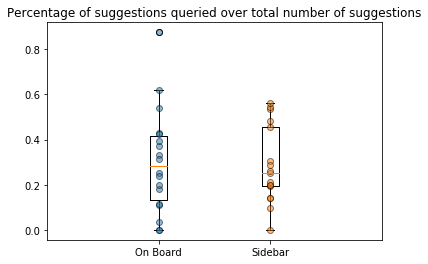

In [13]:
suggestion_df_joined=suggestion_df_joined.astype({'opened': 'float64', 'suggestionsQueried': 'float64'})
suggestions_textcnt=suggestion_df_joined[['boardId', 'suggestionText']].groupby(['boardId']).count().rename(columns={"suggestionText": "suggestionsOffered"})
suggestionsQueried_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'].pivot_table(index=['studyType','boardId'], aggfunc='sum')
suggestionsQueried_onboard=suggestions_textcnt.join(suggestionsQueried_onboard, how='inner')
suggestionsQueried_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'].pivot_table(index=['studyType','boardId'], aggfunc='sum')
suggestionsQueried_sidebar=suggestions_textcnt.join(suggestionsQueried_sidebar, how='inner')
f, ax = plt.subplots()
ax.boxplot(suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered'],positions=[1])
ax.boxplot(suggestionsQueried_sidebar['suggestionsQueried']/suggestionsQueried_sidebar['suggestionsOffered'],positions=[2])
ax.plot([1 for x in range(len(suggestionsQueried_onboard['suggestionsQueried']))], suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2 for x in range(len(suggestionsQueried_sidebar['suggestionsQueried']))], suggestionsQueried_sidebar['suggestionsQueried']/suggestionsQueried_sidebar['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Percentage of suggestions queried over total number of suggestions')
plt.xlim([0, 3])
ax.set_xticks([1, 2])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/suggestionsQueried.png')
aggTotalBoard=aggTotalBoard.join(suggestions_textcnt)
aggTotalBoard=aggTotalBoard.join(suggestion_df_joined.pivot_table(index=['studyType','boardId'], aggfunc='sum')['suggestionsQueried'])

In [14]:

aggTotalBoard

studyType     topicTask  suggestionsOffered  \
studyType boardId                                                    
On Board  o9J_lth3zkI=  On Board  Space Travel                  13   
          o9J_lthxoSw=  On Board      COVID-19                  14   
          o9J_lwT0kWk=  On Board  Space Travel                  22   
          o9J_lwT45Gc=  On Board      COVID-19                  16   
          o9J_lwTEnSI=  On Board  Space Travel                  21   
          o9J_lwi6_1c=  On Board      COVID-19                  27   
          o9J_lwj9wsM=  On Board      COVID-19                  27   
          o9J_lwt44k0=  On Board  Space Travel                  35   
          o9J_lwtLWq0=  On Board  Space Travel                  26   
          o9J_lwtLZY8=  On Board      COVID-19                  27   
          o9J_lx2--OQ=  On Board  Space Travel                  25   
          o9J_lxPFjOs=  On Board  Space Travel                  28   
          o9J_lxTWUZI=  On Board  Space Travel                  28   
          o9J_ly0SnuI=  On Board      COVID-19                  24   
          o9J_lyGIeLY=  On Board      COVID-19                  23   
          o9J_lyYiALM=  On Board  Space Travel                  25   
          o9J_lzYurAk=  On Board      COVID-19                  19   
Sidebar   o9J_lth9DEA=   Sidebar  Space Travel                   6   
          o9J_lthxoK8=   Sidebar      COVID-19                   7   
          o9J_lwMyp0I=   Sidebar      COVID-19                  26   
          o9J_lwT45UE=   Sidebar      COVID-19                  12   
          o9J_lwTEkh4=   Sidebar      COVID-19                  11   
          o9J_lwTEnZk=   Sidebar      COVID-19                  20   
          o9J_lwTHmNo=   Sidebar      COVID-19                  15   
          o9J_lwTHmtQ=   Sidebar  Space Travel                  14   
          o9J_lwhnitY=   Sidebar      COVID-19                  25   
          o9J_lwtLWiA=   Sidebar  Space Travel                  23   
          o9J_lxP9EsE=   Sidebar  Space Travel                  21   
          o9J_ly0SnkM=   Sidebar      COVID-19                  22   
          o9J_ly0Snnk=   Sidebar  Space Travel                  23   
          o9J_lyGIfks=   Sidebar      COVID-19                  19   
          o9J_lyGIfzA=   Sidebar  Space Travel                  15   
          o9J_lyYiAJ0=   Sidebar      COVID-19                  16   
          o9J_lzYgHyw=   Sidebar  Space Travel                  21   

                        suggestionsQueried  
studyType boardId                           
On Board  o9J_lth3zkI=                 7.0  
          o9J_lthxoSw=                 6.0  
          o9J_lwT0kWk=                 4.0  
          o9J_lwT45Gc=                14.0  
          o9J_lwTEnSI=                13.0  
          o9J_lwi6_1c=                10.0  
          o9J_lwj9wsM=                 3.0  
          o9J_lwt44k0=                 4.0  
          o9J_lwtLWq0=                11.0  
          o9J_lwtLZY8=                 1.0  
          o9J_lx2--OQ=                 5.0  
          o9J_lxPFjOs=                11.0  
          o9J_lxTWUZI=                 7.0  
          o9J_ly0SnuI=                 8.0  
          o9J_lyGIeLY=                 0.0  
          o9J_lyYiALM=                 6.0  
          o9J_lzYurAk=                 6.0  
Sidebar   o9J_lth9DEA=                 0.0  
          o9J_lthxoK8=                 1.0  
          o9J_lwMyp0I=                 5.0  
          o9J_lwT45UE=                 3.0  
          o9J_lwTEkh4=                 5.0  
          o9J_lwTEnZk=                 4.0  
          o9J_lwTHmNo=                 8.0  
          o9J_lwTHmtQ=                 2.0  
          o9J_lwhnitY=                12.0  
          o9J_lwtLWiA=                 7.0  
          o9J_lxP9EsE=                 2.0  
          o9J_ly0SnkM=                12.0  
          o9J_ly0Snnk=                 6.0  
          o9J_lyGIfks=                 4.0  
          o9J_lyG

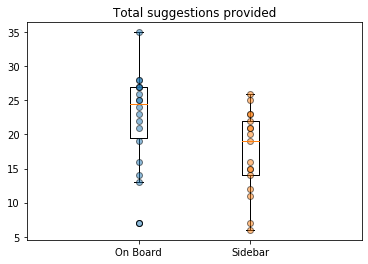

In [15]:
f, ax = plt.subplots()
ax.boxplot(suggestionsQueried_onboard['suggestionsOffered'],positions=[1])
ax.boxplot(suggestionsQueried_sidebar['suggestionsOffered'],positions=[2])
ax.plot([1 for x in range(len(suggestionsQueried_onboard['suggestionsOffered']))], suggestionsQueried_onboard['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2 for x in range(len(suggestionsQueried_sidebar['suggestionsOffered']))], suggestionsQueried_sidebar['suggestionsOffered'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total suggestions provided')
plt.xlim([0, 3])
ax.set_xticks([1, 2])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.show()
#suggestionsQueried_onboard

#### Testing for normality

In [16]:
suggProp_Sidebar=suggestionsQueried_sidebar['suggestionsOffered']/suggestionsQueried_sidebar['suggestionsOffered']
suggProp_Onboard=suggestionsQueried_onboard['suggestionsQueried']/suggestionsQueried_onboard['suggestionsOffered']
print("Sample size:")
print("On Board: " + str(len(suggestionsQueried_onboard['suggestionsQueried'].dropna())))
print("Sidebar: " + str(len(suggestionsQueried_sidebar['suggestionsQueried'].dropna())))
print('Means:')
print('On Board: ' +str(suggProp_Onboard.mean()) )
print('Sidebar: ' +str(suggProp_Sidebar.mean()) )
print('Variance:')
print('On Board: ' +str(suggestionsQueried_onboard['suggestionsQueried'].var()) )
print('Sidebar: ' +str(suggestionsQueried_sidebar['suggestionsQueried'].var()) )
print(stats.shapiro(suggestionsQueried_onboard['suggestionsQueried'].dropna()))
print(stats.shapiro(suggestionsQueried_sidebar['suggestionsQueried'].dropna()))


Sample size:
On Board: 18
Sidebar: 17
Means:
On Board: 0.30170888186970063
Sidebar: 1.0
Variance:
On Board: 17.437908496732028
Sidebar: 12.316176470588237
ShapiroResult(statistic=0.9623935222625732, pvalue=0.6484261155128479)
ShapiroResult(statistic=0.9463647603988647, pvalue=0.4016183018684387)


#### Testing for Homoschedasticity


In [17]:
print(stats.bartlett(suggestionsQueried_onboard['suggestionsQueried'].dropna(), suggestionsQueried_sidebar['suggestionsQueried'].dropna()))
print(stats.levene(suggestionsQueried_onboard['suggestionsQueried'].dropna(), suggestionsQueried_sidebar['suggestionsQueried'].dropna()))

BartlettResult(statistic=0.479566035239911, pvalue=0.48861895059423066)
LeveneResult(statistic=0.4121285494166849, pvalue=0.5253258688667723)


#### Using Contingency table 

In [18]:
contingencytable = np.array([[suggestionsQueried_onboard['suggestionsQueried'].sum(), suggestionsQueried_sidebar['suggestionsQueried'].sum()],
                   [suggestionsQueried_onboard['suggestionsOffered'].sum(), suggestionsQueried_sidebar['suggestionsOffered'].sum()]])

pvalue=stats.chi2_contingency(contingencytable)[1]
pvalue

0.7998929786492531

### Percentage of queries issued from Miro over total number of queries

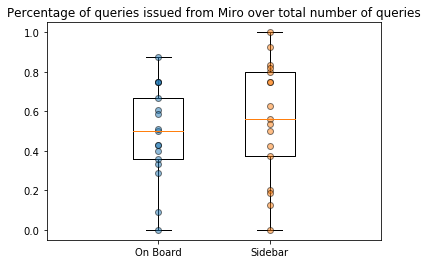

In [19]:
browser_df_joined['time_diff'] = browser_df_joined.groupby(['boardId'])['timestamp'].diff()
browser_pivottable=browser_df_joined.pivot_table(index=['boardId'],columns='studyType')
browser_pivottable_sum=browser_df_joined.pivot_table(index=['boardId'],columns='studyType', aggfunc='sum')
browser_pivottable_count=browser_df_joined[['clickedFromMiro', 'webpagesVisited', 'boardId', 'studyType']].pivot_table(index=['boardId'],columns='studyType', aggfunc='count')
browser_percentage = browser_pivottable_sum/browser_pivottable_count
queries_notfrommiro =browser_pivottable_count-browser_pivottable_sum
f, ax = plt.subplots()
ax.boxplot(browser_percentage['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(browser_percentage['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(browser_percentage['clickedFromMiro']['On Board']))], browser_percentage['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_percentage['clickedFromMiro']['Sidebar']))], browser_percentage['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Percentage of queries issued from Miro over total number of queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/MiroQueries.png')

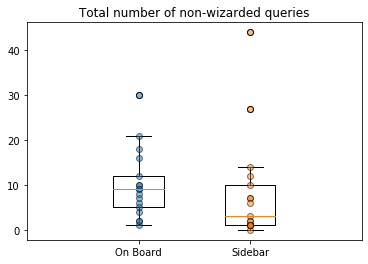

In [20]:
f, ax = plt.subplots()
ax.boxplot(queries_notfrommiro['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(queries_notfrommiro['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(queries_notfrommiro['clickedFromMiro']['On Board']))], queries_notfrommiro['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(queries_notfrommiro['clickedFromMiro']['Sidebar']))], queries_notfrommiro['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total number of non-wizarded queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
aggTotalBoard=aggTotalBoard.join(queries_notfrommiro['clickedFromMiro']).fillna(0)
aggTotalBoard['queriesNotFromMiro']=aggTotalBoard['On Board']+aggTotalBoard['Sidebar']
aggTotalBoard=aggTotalBoard.drop(['On Board', 'Sidebar'], axis=1)

In [21]:
browser_df_joined[browser_df_joined['boardId']=='o9J_lxTWUZI=']

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff
337,o9J_lxTWUZI=,2021-09-14 18:01:20.481663,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space exploration essay', 'Space travel hist...",39,0,On Board,Space Travel,NaT
338,o9J_lxTWUZI=,2021-09-14 18:42:16.877196,Space shuttle PRELIMINARY FACTORS,[''],['What are the 3 main components of the space ...,"['Rogers Commission report Volume 2 pdf', 'Spa...",0,1,On Board,Space Travel,0 days 00:40:56.395533
339,o9J_lxTWUZI=,2021-09-14 18:44:03.910994,Space shuttle PRELIMINARY FACTORS,[''],['What are the 3 main components of the space ...,"['Rogers Commission report Volume 2 pdf', 'Spa...",2,1,On Board,Space Travel,0 days 00:01:47.033798
340,o9J_lxTWUZI=,2021-09-14 18:48:10.087118,Space rocket PRELIMINARY FACTORS,[''],['What are some factors that affect rocket lau...,"['Rocket launching process', 'Why do we launch...",1,1,On Board,Space Travel,0 days 00:04:06.176124
341,o9J_lxTWUZI=,2021-09-14 18:48:26.014671,Space rocket PRELIMINARY FACTORS,[''],['What are some factors that affect rocket lau...,"['Rocket launching process', 'Why do we launch...",0,1,On Board,Space Travel,0 days 00:00:15.927553
342,o9J_lxTWUZI=,2021-09-14 18:50:46.755433,Space X reusable rocket Futurization of Space ...,"['""spacex reusable rocket name""', '""spacex reu...",['How will reusable rockets change space trave...,"['SpaceX reusable rocket landing', 'First reus...",2,1,On Board,Space Travel,0 days 00:02:20.740762
343,o9J_lxTWUZI=,2021-09-14 18:57:16.247488,Virgin Galactic WHO,"['""virgin galactic who owns""', '""virgin galact...",NaN,"['Virgin Galactic stock', 'Virgin Galactic cre...",1,1,On Board,Space Travel,0 days 00:06:29.492055
344,o9J_lxTWUZI=,2021-09-14 18:58:10.837640,Blue Origin WHO,"['""blue origin who owns""', '""blue origin who i...","['When did Bezos start Blue Origin?', 'Which i...","['Blue Origin vs SpaceX', 'Blue Origin Twitter...",0,1,On Board,Space Travel,0 days 00:00:54.590152


In [22]:
suggestion_df_joined[suggestion_df_joined['boardId']=='o9J_lxTWUZI=']

,boardId,suggId,timestamp,suggestionText,type,status,lastUpdated,parentIdA,parentIdB,grouping,studyType,topicTask,opened,suggestionsQueried
468,o9J_lxTWUZI=,-Mj_aIbGtHCM633QjrMb,2021-09-14 18:37:09.436356,Space rocket,Cluster Title,5,2021-09-14 18:37:51.758591,3074457363959858546,0,Cluster,On Board,Space Travel,1.0,1.0
469,o9J_lxTWUZI=,-Mj_aIelErTEMaX8oot4,2021-09-14 18:37:09.436356,Space shuttle,Cluster Title,5,2021-09-14 18:37:53.300640,3074457363959858546,0,Cluster,On Board,Space Travel,1.0,1.0
470,o9J_lxTWUZI=,-Mj_aWmQp2NsNZ5EAxu9,2021-09-14 18:38:07.495489,Space X reusable rocket,Cross-Pollination,4,2021-09-14 18:51:14.185475,3074457363959858546,3074457363959991126,Line,On Board,Space Travel,1.0,1.0
471,o9J_lxTWUZI=,-Mj_ab_QQ6Jd9feUTTWP,2021-09-14 18:38:31.233157,Virgin Galactic,Cluster Title,4,2021-09-14 18:57:57.304638,3074457363959991126,0,Cluster,On Board,Space Travel,1.0,1.0
472,o9J_lxTWUZI=,-Mj_abckpG1wRkGuXVFd,2021-09-14 18:38:31.233157,Blue Origin,Cluster Title,4,2021-09-14 18:58:10.362214,3074457363959991126,0,Cluster,On Board,Space Travel,1.0,1.0
473,o9J_lxTWUZI=,-Mj_aq9Dlxa8DIeHx61r,2021-09-14 18:39:30.932448,Sub-orbital space tourism,Cross-Pollination,1,NaT,3074457363959991126,3074457363959991344,Line,On Board,Space Travel,0.0,0.0
474,o9J_lxTWUZI=,-Mj_aqCnSF-O9UXfS4kL,2021-09-14 18:39:30.932448,Asteroid mining,Cross-Pollination,1,NaT,3074457363959991126,3074457363959991344,Line,On Board,Space Travel,0.0,0.0
475,o9J_lxTWUZI=,-Mj_aqGpdFEsJ3OIY8ul,2021-09-14 18:39:30.932448,Artemis Program,Cross-Pollination,1,NaT,3074457363959991126,3074457363959991344,Line,On Board,Space Travel,0.0,0.0
476,o9J_lxTWUZI=,-Mj_bCgf-AX52ZmA5fze,2021-09-14 18:41:07.343009,Space shuttle,Cluster Title,5,2021-09-14 18:50:03.048254,3074457363959858546,0,Cluster,On Board,Space Travel,1.0,1.0
477,o9J_lxTWUZI=,-Mj_bCkBCy-KdulwtAr7,2021-09-14 18:41:07.343009,Space rocket,Cluster Title,5,2021-09-14 18:50:04.367630,3074457363959858546,0,Cluster,On Board,Space Travel,1.0,1.0


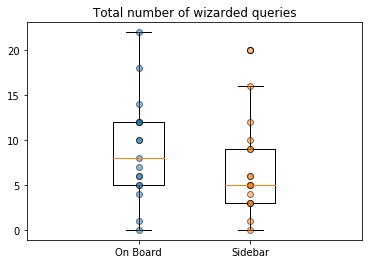

In [23]:
f, ax = plt.subplots()
ax.boxplot(browser_pivottable_sum['clickedFromMiro']['On Board'].dropna(),positions=[1/3])
ax.boxplot(browser_pivottable_sum['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3])
ax.plot([1/3 for x in range(len(browser_pivottable_sum['clickedFromMiro']['On Board']))], browser_pivottable_sum['clickedFromMiro']['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_pivottable_sum['clickedFromMiro']['Sidebar']))], browser_pivottable_sum['clickedFromMiro']['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
ax.set_title('Total number of wizarded queries')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
aggTotalBoard=aggTotalBoard.join(browser_pivottable_sum['clickedFromMiro']).fillna(0)
aggTotalBoard['queriesFromMiro']=aggTotalBoard['On Board']+aggTotalBoard['Sidebar']
aggTotalBoard=aggTotalBoard.drop(['On Board', 'Sidebar'], axis=1)

In [24]:
print("Sample size:")
print("On Board: " + str(len(browser_pivottable['clickedFromMiro']['On Board'].dropna())))
print("Sidebar: " + str(len(browser_pivottable['clickedFromMiro']['Sidebar'].dropna())))
print('Means:')
print('On Board: ' +str(browser_pivottable['clickedFromMiro']['On Board'].dropna().mean()) )
print('Sidebar: ' +str(browser_pivottable['clickedFromMiro']['Sidebar'].dropna().mean()) )
print('Variance:')
print('On Board: ' +str(browser_pivottable['clickedFromMiro']['On Board'].dropna().var()) )
print('Sidebar: ' +str(browser_pivottable['clickedFromMiro']['Sidebar'].dropna().var()) )
print(stats.shapiro(browser_pivottable['clickedFromMiro']['On Board'].dropna()))
print(stats.shapiro(browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))

Sample size:
On Board: 17
Sidebar: 17
Means:
On Board: 0.4896745849516114
Sidebar: 0.5533025004708358
Variance:
On Board: 0.0565930949075509
Sidebar: 0.08934946414691909
ShapiroResult(statistic=0.9676368236541748, pvalue=0.7758497595787048)
ShapiroResult(statistic=0.9537006616592407, pvalue=0.5176024436950684)


#### Testing for homoscedascity

In [25]:
print(stats.bartlett(browser_pivottable['clickedFromMiro']['On Board'].dropna(), browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))
print(stats.levene(browser_pivottable['clickedFromMiro']['On Board'].dropna(), browser_pivottable['clickedFromMiro']['Sidebar'].dropna()))

BartlettResult(statistic=0.8019726147128743, pvalue=0.3705042438278189)
LeveneResult(statistic=1.2384851183884091, pvalue=0.27405359144647035)


#### Using contingency table

In [26]:
onboardMiroQueries = browser_pivottable_sum['clickedFromMiro']['On Board'].sum()
sidebarMiroQueries = browser_pivottable_sum['clickedFromMiro']['Sidebar'].sum()
totalOnBoardQueries = browser_pivottable_count['clickedFromMiro']['On Board'].sum()
totalSidebarQueries = browser_pivottable_count['clickedFromMiro']['Sidebar'].sum()
contingencytable= [[onboardMiroQueries, sidebarMiroQueries], [totalOnBoardQueries, totalSidebarQueries]]

pvalue=stats.chi2_contingency(contingencytable)[1]
pvalue

0.8863127743347264

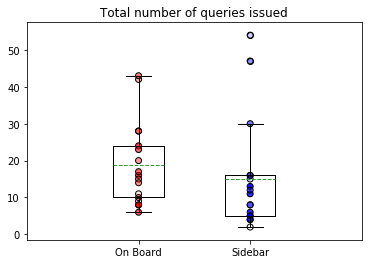

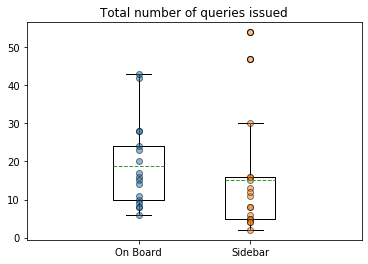

In [27]:
browser_pivottable_count
rgba_colors1 = np.zeros((17,4))
rgba_colors1[:,0] = 1.0
rgba_colors1[:, 3] = browser_percentage['clickedFromMiro']['On Board'].dropna()
rgba_colors2 = np.zeros((17,4))
rgba_colors2[:,2] = 1.0
rgba_colors2[:, 3] = browser_percentage['clickedFromMiro']['Sidebar'].dropna()
f, ax = plt.subplots()
ax.boxplot(browser_pivottable_count['clickedFromMiro']['On Board'].dropna(),positions=[1/3], meanline=True, showmeans=True, medianprops={'linewidth': 0})
ax.boxplot(browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3],meanline=True, showmeans=True, medianprops={'linewidth': 0})
ax.scatter([1/3  for x in range(len(browser_pivottable_count['clickedFromMiro']['On Board'].dropna()))], browser_pivottable_count['clickedFromMiro']['On Board'].dropna(), c=rgba_colors1, edgecolors='k')
ax.scatter([2/3 for x in range(len(browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna()))], browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna(), c=rgba_colors2, edgecolors='k')
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Total number of queries issued')
plt.show()
f, ax = plt.subplots()
ax.boxplot(browser_pivottable_count['clickedFromMiro']['On Board'].dropna(),positions=[1/3], meanline=True, showmeans=True, medianprops={'linewidth': 0})
ax.boxplot(browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna(),positions=[2/3],meanline=True, showmeans=True, medianprops={'linewidth': 0})
ax.plot([1/3  for x in range(len(browser_pivottable_count['clickedFromMiro']['On Board'].dropna()))], browser_pivottable_count['clickedFromMiro']['On Board'].dropna(),'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna()))], browser_pivottable_count['clickedFromMiro']['Sidebar'].dropna(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Total number of queries issued')
plt.show()

In [28]:
browser_pivottable_count
##Outliers: 
##For On board: o9J_lxPFjOs= P13
##For Sidebar: o9J_lzYgHyw=, o9J_ly0SnkM= P1, P3

clickedFromMiro         webpagesVisited        
studyType           On Board Sidebar        On Board Sidebar
boardId                                                     
o9J_lth3zkI=            16.0     NaN            16.0     NaN
o9J_lth9DEA=             NaN     2.0             NaN     2.0
o9J_lthxoK8=             NaN     8.0             NaN     8.0
o9J_lthxoSw=            20.0     NaN            20.0     NaN
o9J_lwMyp0I=             NaN     6.0             NaN     6.0
o9J_lwT0kWk=             6.0     NaN             6.0     NaN
o9J_lwT45Gc=            24.0     NaN            24.0     NaN
o9J_lwT45UE=             NaN     8.0             NaN     8.0
o9J_lwTEkh4=             NaN     5.0             NaN     5.0
o9J_lwTEnSI=            23.0     NaN            23.0     NaN
o9J_lwTEnZk=             NaN     5.0             NaN     5.0
o9J_lwTHmNo=             NaN    11.0             NaN    11.0
o9J_lwTHmtQ=             NaN     4.0             NaN     4.0
o9J_lwhnitY=             NaN    13.0             NaN    13.0
o9J_lwi6_1c=            17.0     NaN            17.0     NaN
o9J_lwj9wsM=            10.0     NaN            10.0     NaN
o9J_lwt44k0=            15.0     NaN            15.0     NaN
o9J_lwtLWiA=             NaN    16.0             NaN    16.0
o9J_lwtLWq0=            42.0     NaN            42.0     NaN
o9J_lwtLZY8=            11.0     NaN            11.0     NaN
o9J_lx2--OQ=            28.0     NaN            28.0     NaN
o9J_lxP9EsE=             NaN     4.0             NaN     4.0
o9J_lxPFjOs=            43.0     NaN            43.0     NaN
o9J_lxTWUZI=             8.0     NaN             8.0     NaN
o9J_ly0SnkM=             NaN    47.0             NaN    47.0
o9J_ly0Snnk=             NaN    12.0             NaN    12.0
o9J_ly0SnuI=            28.0     NaN            28.0     NaN
o9J_lyGIeLY=             9.0     NaN             9.0     NaN
o9J_lyGIfks=             NaN    16.0             NaN    16.0
o9J_lyGIfzA=             NaN    15.0             NaN    15.0
o9J_lyYiAJ0=             NaN    30.0             NaN    30.0
o9J_lyYiALM=             8.0     NaN             8.0     NaN
o9J_lzYgHyw=             NaN    54.0             NaN    54.0
o9J_lzYurAk=            14.0     NaN            14.0     NaN

### Total Queries Issued

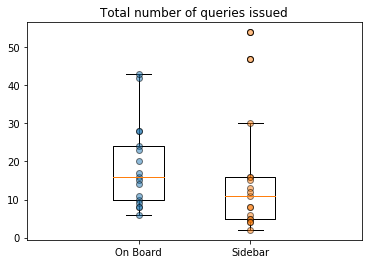

In [29]:
total_queries = browser_df_joined.pivot_table('timestamp', index=['boardId'],columns='studyType', aggfunc=len,dropna=False)
#total_queries_avg = pd.DataFrame([[total_queries['On Board'].mean(), total_queries['Sidebar'].mean()]], columns = ['On Board', 'Sidebar'], index=['Avg'])
#total_queries=total_queries.append(total_queries_avg)
total_queries.style.set_caption('Number of queries')
f, ax = plt.subplots()
ax.boxplot(total_queries['On Board'].dropna(),positions=[1/3], meanline=True)
ax.boxplot(total_queries['Sidebar'].dropna(),positions=[2/3],meanline=True)
ax.plot([1/3  for x in range(len(total_queries['On Board']))], total_queries['On Board'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(total_queries['Sidebar']))], total_queries['Sidebar'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Total number of queries issued')
plt.savefig(r'C://Users/sheld/ReimaginedSearch/visualizations/totalQueries.png')

In [30]:
print("Sample size:")
print("On Board: " + str(len(total_queries['On Board'].dropna())))
print("Sidebar: " + str(len(total_queries['Sidebar'].dropna())))
print('Means:')
print('On Board: ' +str(total_queries['On Board'].dropna().mean()) )
print('Sidebar: ' +str(total_queries['Sidebar'].dropna().mean()) )
print('Variance:')
print('On Board: ' +str(total_queries['On Board'].dropna().var()) )
print('Sidebar: ' +str(total_queries['Sidebar'].dropna().var()) )
print(stats.shapiro(total_queries['On Board'].dropna()))
print(stats.shapiro(total_queries['Sidebar'].dropna()))

Sample size:
On Board: 17
Sidebar: 17
Means:
On Board: 18.941176470588236
Sidebar: 15.058823529411764
Variance:
On Board: 126.18382352941178
Sidebar: 224.43382352941174
ShapiroResult(statistic=0.8879599571228027, pvalue=0.04288503900170326)
ShapiroResult(statistic=0.7495495080947876, pvalue=0.000446480669779703)


#### Using Mann-Whitney U Test

In [31]:
stats.mannwhitneyu(total_queries['On Board'].dropna(), total_queries['Sidebar'].dropna())

MannwhitneyuResult(statistic=95.5, pvalue=0.047156806197130405)

#### Using two sample t-test

In [32]:
stats.ttest_ind(total_queries['On Board'].dropna(), total_queries['Sidebar'].dropna())

Ttest_indResult(statistic=0.8548749461525149, pvalue=0.39897568510702974)

### Percentage of suggestions queried by type

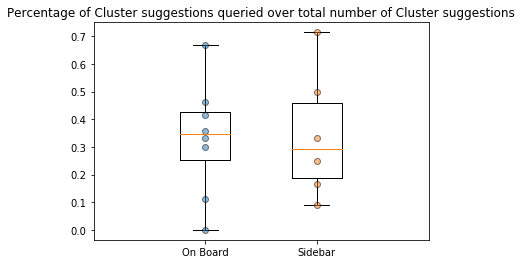

Sample size:
On Board: 8
Sidebar: 6
Means:
On Board: 0.3308073870573871
Sidebar: 0.3425324675324675
Variance:
On Board: 0.04237327127322548
Sidebar: 0.053177297089634756
ShapiroResult(statistic=0.9685507416725159, pvalue=0.8863990306854248)
ShapiroResult(statistic=0.9468005299568176, pvalue=0.7143152952194214)
BartlettResult(statistic=0.06996589573226837, pvalue=0.791386442314786)
LeveneResult(statistic=0.14556187925502698, pvalue=0.7094828281668072)
Ttest_indResult(statistic=-0.10027716109255598, pvalue=0.9217801549606836)
MannwhitneyuResult(statistic=23.5, pvalue=0.5)


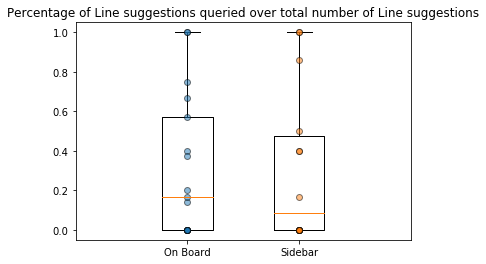

Sample size:
On Board: 17
Sidebar: 14
Means:
On Board: 0.31015406162464987
Sidebar: 0.30884353741496595
Variance:
On Board: 0.13043511154461782
Sidebar: 0.15362238668361117
ShapiroResult(statistic=0.8195627927780151, pvalue=0.003810569876804948)
ShapiroResult(statistic=0.7705335021018982, pvalue=0.0022063516080379486)
BartlettResult(statistic=0.09318722272883721, pvalue=0.7601637036240679)
LeveneResult(statistic=0.05831428816509653, pvalue=0.8108797541191012)
Ttest_indResult(statistic=0.009676226017478813, pvalue=0.9923458692313877)
MannwhitneyuResult(statistic=115.0, pvalue=0.44195273051534534)


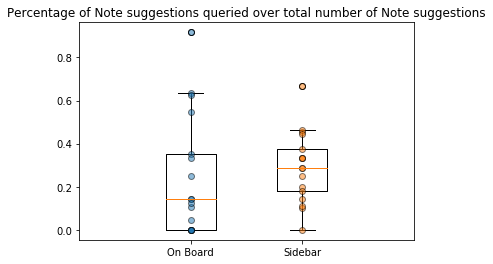

Sample size:
On Board: 17
Sidebar: 17
Means:
On Board: 0.2482429335370512
Sidebar: 0.29173000202411964
Variance:
On Board: 0.0782414276833323
Sidebar: 0.02689570399783899
ShapiroResult(statistic=0.8425139784812927, pvalue=0.008262411691248417)
ShapiroResult(statistic=0.9776415228843689, pvalue=0.9326362609863281)
BartlettResult(statistic=4.227426099284678, pvalue=0.039775716596017675)
LeveneResult(statistic=2.082707815268472, pvalue=0.15869426209133125)
Ttest_indResult(statistic=-0.5529763159048559, pvalue=0.5841223931204708)
MannwhitneyuResult(statistic=109.5, pvalue=0.11644274764718882)


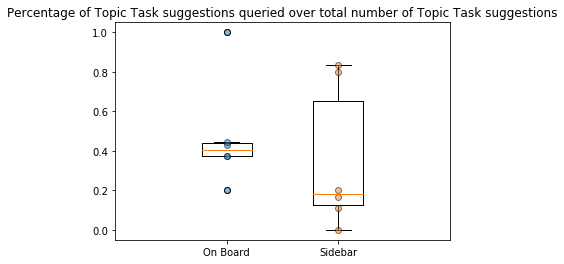

Sample size:
On Board: 6
Sidebar: 6
Means:
On Board: 0.4705026455026455
Sidebar: 0.35185185185185186
Variance:
On Board: 0.07484357940707145
Sidebar: 0.13435390946502057
ShapiroResult(statistic=0.7751861214637756, pvalue=0.03474731370806694)
ShapiroResult(statistic=0.7979158163070679, pvalue=0.05628582462668419)
BartlettResult(statistic=0.3835697031444337, pvalue=0.535698956199126)
LeveneResult(statistic=0.4767086078493478, pvalue=0.5056257160797766)
Ttest_indResult(statistic=0.635430474398752, pvalue=0.5394154433566822)
MannwhitneyuResult(statistic=10.5, pvalue=0.13032906190565646)


In [33]:
suggestiongroups_df_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='mean')
suggestiongroups_df_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='mean')
for item in suggestiongroups_df_onboard['opened'].columns:
    f, ax = plt.subplots()
    ax.boxplot(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(),positions=[1/3])
    ax.boxplot(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(),positions=[2/3])
    ax.plot([1/3  for x in range(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))], suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    ax.plot([2/3 for x in range(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))], suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    plt.xlim([0, 1])
    ax.set_xticks([1/3, 2/3])
    ax.set_xticklabels(['On Board', 'Sidebar'])
    ax.set_title('Percentage of ' + item + ' suggestions queried over total number of ' + item + ' suggestions')
    plt.show()
    print("Sample size:")
    print("On Board: " + str(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())))
    print("Sidebar: " + str(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna())))
    print('Means:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().mean()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().mean()) )
    print('Variance:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().var()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().var()) )
    print(stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))
    print(stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.bartlett(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
            
    print(stats.mannwhitneyu(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#     if stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()).pvalue<0.05 and stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()).pvalue<0.05:
#             print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#             print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
#     else:
#         print(stats.mannwhitneyu(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
# print(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())

### Total number of suggestions queried by type

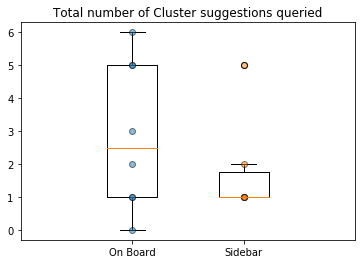

Sample size:
On Board: 8
Sidebar: 6
Means:
On Board: 2.875
Sidebar: 1.8333333333333333
Variance:
On Board: 4.982142857142857
Sidebar: 2.5666666666666673
ShapiroResult(statistic=0.916150689125061, pvalue=0.39941465854644775)
ShapiroResult(statistic=0.6340762376785278, pvalue=0.0011580615537241101)
BartlettResult(statistic=0.5598968688832275, pvalue=0.45430179864093)
LeveneResult(statistic=2.1557918942224776, pvalue=0.1677519832676981)
Ttest_indResult(statistic=0.9673393805848047, pvalue=0.3524667267881729)


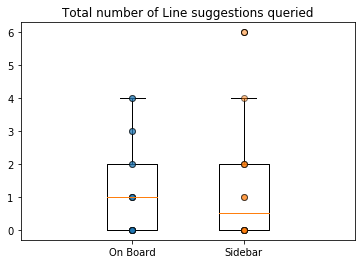

Sample size:
On Board: 17
Sidebar: 14
Means:
On Board: 1.2941176470588236
Sidebar: 1.2857142857142858
Variance:
On Board: 2.0955882352941178
Sidebar: 3.296703296703297
ShapiroResult(statistic=0.8232406377792358, pvalue=0.0043027400970458984)
ShapiroResult(statistic=0.7515289187431335, pvalue=0.0013336106203496456)
BartlettResult(statistic=0.7164077410071087, pvalue=0.397324769140327)
LeveneResult(statistic=0.14930415895744517, pvalue=0.7020218239855266)
Ttest_indResult(statistic=0.014346673283947519, pvalue=0.9886516510625685)


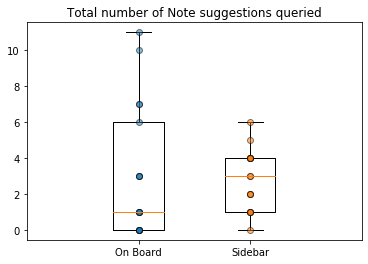

Sample size:
On Board: 17
Sidebar: 17
Means:
On Board: 3.176470588235294
Sidebar: 2.764705882352941
Variance:
On Board: 13.40441176470588
Sidebar: 2.816176470588236
ShapiroResult(statistic=0.8198314905166626, pvalue=0.003844414371997118)
ShapiroResult(statistic=0.9401297569274902, pvalue=0.3197272717952728)
BartlettResult(statistic=8.61562995817031, pvalue=0.0033329050634358817)
LeveneResult(statistic=2.8100929614873835, pvalue=0.10341774651773482)
Ttest_indResult(statistic=0.4215414445617743, pvalue=0.6761780786219002)


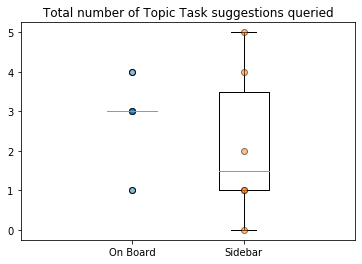

Sample size:
On Board: 6
Sidebar: 6
Means:
On Board: 2.8333333333333335
Sidebar: 2.1666666666666665
Variance:
On Board: 0.9666666666666666
Sidebar: 3.7666666666666666
ShapiroResult(statistic=0.7698016166687012, pvalue=0.030909432098269463)
ShapiroResult(statistic=0.9123750925064087, pvalue=0.4522051513195038)
BartlettResult(statistic=1.9576186608355282, pvalue=0.16176822752589193)
LeveneResult(statistic=2.608695652173913, pvalue=0.13735257071320003)
Ttest_indResult(statistic=0.750586625040802, pvalue=0.47019420700888015)


In [34]:
suggestiongroups_df_onboard=suggestion_df_joined[suggestion_df_joined['studyType']=='On Board'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')
suggestiongroups_df_sidebar=suggestion_df_joined[suggestion_df_joined['studyType']=='Sidebar'][['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')
for item in suggestiongroups_df_onboard['opened'].columns:
    f, ax = plt.subplots()
    ax.boxplot(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(),positions=[1/3])
    ax.boxplot(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(),positions=[2/3])
    ax.plot([1/3  for x in range(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))], suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    ax.plot([2/3 for x in range(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))], suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna(), 'o', markeredgecolor='k', alpha=0.5)
    plt.xlim([0, 1])
    ax.set_xticks([1/3, 2/3])
    ax.set_xticklabels(['On Board', 'Sidebar'])
    ax.set_title('Total number of ' + item + ' suggestions queried')
    plt.show()
    print("Sample size:")
    print("On Board: " + str(len(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna())))
    print("Sidebar: " + str(len(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna())))
    print('Means:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().mean()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().mean()) )
    print('Variance:')
    print('On Board: ' +str(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna().var()) )
    print('Sidebar: ' +str(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna().var()) )
    print(stats.shapiro(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna()))
    print(stats.shapiro(suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.bartlett(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.levene(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
    print(stats.ttest_ind(suggestiongroups_df_onboard['suggestionsQueried'][item].dropna(), suggestiongroups_df_sidebar['suggestionsQueried'][item].dropna()))
          

In [35]:
suggestion_df_joined[['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')
aggTotalBoard=aggTotalBoard.join(suggestion_df_joined[['opened', 'suggestionsQueried', 'studyType','boardId', 'grouping']].pivot_table(index=['studyType','boardId'], columns='grouping', aggfunc='sum')['suggestionsQueried']).fillna(0)



## Timeline visualization using test board	

In [36]:
boardId = 'o9J_lthxoSw='
df_queries = browser_df_joined[['timestamp', 'query', 'webpagesVisited','clickedFromMiro']][(browser_df_joined['boardId']==boardId)]
df_queries['timestamp'] = pd.to_datetime(df_queries['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
df_queries['webpagesVisited']=df_queries['webpagesVisited'].astype('float')
df_miroqueries = df_queries[df_queries['clickedFromMiro']==1].set_index('timestamp')
df_queries = df_queries.set_index('timestamp')
df_queries
browser_df_joined[browser_df_joined['boardId']=='o9J_lwT0kWk=']

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff
52,o9J_lwT0kWk=,2021-09-17 19:41:28.958259,space travel,"['""space travel news""', '""space travel movies""...","['How much does traveling to space cost?', 'Ho...","['Space travel history', 'Space travel Richard...",1,0,On Board,Space Travel,NaT
53,o9J_lwT0kWk=,2021-09-17 19:45:43.635124,future of space travel,"['""future of space travel propulsion""', '""futu...","['What will space travel be like in 2050?', 'W...","['Facts about future space travel', 'Future sp...",1,0,On Board,Space Travel,0 days 00:04:14.676865
54,o9J_lwT0kWk=,2021-09-17 19:47:14.867610,Virgin Galactic Futurization of Space Travel,"['""space travel virgin galactic""', '""virgin ga...",['Virgin Galactic astronauts'],"['Virgin Galactic space mission crew', 'Virgin...",1,1,On Board,Space Travel,0 days 00:01:31.232486
55,o9J_lwT0kWk=,2021-09-17 19:57:43.344528,Sub-orbital space tourism Futurization of Spac...,"['""suborbital space tourism""', '""suborbital sp...","['What are 3 Limitations of space travel?', 'W...","['Space tourism SpaceX', 'What organizations a...",0,1,On Board,Space Travel,0 days 00:10:28.476918
56,o9J_lwT0kWk=,2021-09-17 19:57:56.813377,Billionaire space race Futurization of Space T...,[''],"['How many billionaires have gone to space?', ...","['Billionaire space flight', 'Billionaire spac...",3,1,On Board,Space Travel,0 days 00:00:13.468849
57,o9J_lwT0kWk=,2021-09-17 20:19:18.468496,Outer Space Treaty Futurization of Space Travel,[''],['What is Article 4 of the Outer Space Treaty?...,"['Outer space Treaty 1967 pdf', 'Space Treaty ...",1,1,On Board,Space Travel,0 days 00:21:21.655119


In [37]:

suggestion_df_joined[suggestion_df_joined['boardId']=='o9J_lwT0kWk=']

,boardId,suggId,timestamp,suggestionText,type,status,lastUpdated,parentIdA,parentIdB,grouping,studyType,topicTask,opened,suggestionsQueried
73,o9J_lwT0kWk=,-MjpHkNb56ZW92drICVk,2021-09-17 19:45:39.838917,SpaceX,Note,2,2021-09-17 19:55:13.053901,3074457364169435858,0,Note,On Board,Space Travel,0.0,0.0
74,o9J_lwT0kWk=,-MjpHkRrDYtuULj--y9_,2021-09-17 19:45:39.838917,Virgin Galactic,Note,4,2021-09-17 19:55:13.082706,3074457364169435858,0,Note,On Board,Space Travel,1.0,1.0
75,o9J_lwT0kWk=,-MjpHkY45QFP50XURhIB,2021-09-17 19:45:39.838917,Blue Origin,Note,2,2021-09-17 19:55:13.057347,3074457364169435858,0,Note,On Board,Space Travel,0.0,0.0
76,o9J_lwT0kWk=,-MjpIEPySkVuMU5_L87E,2021-09-17 19:47:46.952207,NASA's budget peaked during Apollo program,Note,2,2021-09-17 19:55:13.289520,3074457364169435858,0,Note,On Board,Space Travel,0.0,0.0
77,o9J_lwT0kWk=,-MjpIllBsjyuJ_TyWLoB,2021-09-17 19:50:07.648165,Russian Federal Space Agency (Roskosmos),Note,2,2021-09-17 20:24:09.715763,3074457364164475795,0,Note,On Board,Space Travel,0.0,0.0
78,o9J_lwT0kWk=,-MjpIlodbd5w0WLLi8mP,2021-09-17 19:50:07.648165,International Space Station,Note,2,2021-09-17 20:24:09.764482,3074457364164475795,0,Note,On Board,Space Travel,0.0,0.0
79,o9J_lwT0kWk=,-MjpIlsAZO-Uo3D6OyEj,2021-09-17 19:50:07.648165,China's Tiangong space station,Note,2,2021-09-17 20:24:09.719570,3074457364164475795,0,Note,On Board,Space Travel,0.0,0.0
80,o9J_lwT0kWk=,-MjpJL6hrix6c4ikbqcA,2021-09-17 19:52:36.541880,Moon Race,Note,2,2021-09-17 19:55:13.055465,3074457364169435858,0,Note,On Board,Space Travel,0.0,0.0
81,o9J_lwT0kWk=,-MjpK79eCnJ_FN4y6JFo,2021-09-17 19:56:01.534923,Sub-orbital space tourism,Note,4,2021-09-17 19:57:42.319359,3074457364169614565,0,Note,On Board,Space Travel,1.0,1.0
82,o9J_lwT0kWk=,-MjpKUjFyrbmHVU1MCg9,2021-09-17 19:57:38.077856,Billionaire space race,Line,4,2021-09-17 19:57:56.370704,3074457364169614565,3074457364169808445,Line,On Board,Space Travel,1.0,1.0


In [38]:
browser_df_joined[browser_df_joined['boardId']=='o9J_lxP9EsE=']

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff
290,o9J_lxP9EsE=,2021-09-13 21:02:54.423790,space travel,"['""space travel news""', '""space travel movies""...","['How far can we travel in space?', 'Is space ...","['Space travel facts', 'Space travel Richard B...",9,0,Sidebar,Space Travel,NaT
291,o9J_lxP9EsE=,2021-09-13 21:43:43.337157,Blue Origin,"['""blue origin stock""', '""blue origin rocket""'...","['What is Blue Origin the name of?', 'What mak...","['Blue Origin vs SpaceX', 'Blue Origin stock',...",2,1,Sidebar,Space Travel,0 days 00:40:48.913367
292,o9J_lxP9EsE=,2021-09-13 21:50:21.320302,lunar economy,"['""lunar economy""', '""lunar economy definition...","['What is the lunar program?', ""Why don't we c...","['Moon colony 2024', 'Living on the Moon 2020'...",2,1,Sidebar,Space Travel,0 days 00:06:37.983145
293,o9J_lxP9EsE=,2021-09-13 21:52:15.257319,lunar economy,"['""lunar economy""', '""lunar economy definition...","['Is living on the Moon possible?', 'What is t...","['Moon colony 2024', 'Living on the Moon 2020'...",7,1,Sidebar,Space Travel,0 days 00:01:53.937017


In [39]:
boardId = 'o9J_lwTEkh4='
boardHists=pd.read_csv('boardHistory.csv')
def create_suggestions_df(boardId):
    suggestiongroup_df=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp']].groupby(['timestamp']).describe().type.top
    df_suggestions=suggestion_df_joined[suggestion_df_joined['boardId']==boardId].sort_values('timestamp')[['type', 'timestamp', 'opened', 'suggestionsQueried']].groupby(['timestamp']).sum()
    df_suggestions['type']=suggestiongroup_df
    df_suggestions['suggestionCount']=suggestion_df_joined[suggestion_df_joined['boardId']==boardId][['type', 'timestamp']].groupby(['timestamp']).count()
    return df_suggestions
def create_queries_df(boardId):
    df_queries = browser_df_joined[['timestamp', 'query', 'webpagesVisited','clickedFromMiro']][(browser_df_joined['boardId']==boardId)]
    df_queries['timestamp'] = pd.to_datetime(df_queries['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    df_queries['webpagesVisited']=df_queries['webpagesVisited'].astype('float')
    df_miroqueries = df_queries[df_queries['clickedFromMiro']==1].set_index('timestamp')
    df_queries = df_queries.set_index('timestamp')
    return (df_miroqueries, df_queries)
def create_board_df(boardId):
    print(boardId)
    columns = ['timestamp', 'addedWidgets','totalCharacters']#, 'metadataType']
    board_df = pd.DataFrame(columns = columns)
    board_list=[]
    board_intervals=[]
    boardHist=boardHists[boardHists['boardId']==boardId]
    for key, item in boardHist.iterrows():
        widgetTypes = []
        boundsList = []
        if 'timestamp' in item and item['timestamp']>="2021-10-01T00:00:00.000000":
            continue
        if 'content' in item:
            addedWidgets = 0
            totalCharacters = 0
            content = list(eval(item['content']))
            for widget in content:
                if widget['type']=='LINE' and 'metadata' in widget:
                    continue
                if widget['createdUserId']in ['3074457360807760467', '3074457358223351101']:
                    continue
                text = widget['plainText'] if 'plainText' in widget else ''
                if 'metadata' in widget and client_id in widget['metadata']:
                    widgetType = widget['metadata'][client_id]['type']
                elif 'metadata' in widget and client_id2 in widget['metadata']:
                    widgetType = widget['metadata'][client_id2]['type']
                elif widget['type']=='SHAPE' and 'style' in widget and widget['style']['borderStyle']==1 and widget['style']['shapeType']==7:
                    widgetType='Cluster'
                else:
                    widgetType=widget['type']
                if '🔎︎' in text or '✗' in text:
                    continue
                totalCharacters+=len(text)
                if widget['id'] in board_list:
                    continue
                addedWidgets+=1
                board_list.append(widget['id'])
                widgetTypes.append(widgetType)
                boundsList.append(widget['bounds'])
            board_intervals.append({'timestamp': item['timestamp'], 'addedWidgets': addedWidgets,'totalCharacters': totalCharacters, 'widgetTypes': widgetTypes, 'bounds': boundsList})
            
    board_df=pd.DataFrame(board_intervals)
    board_df['timestamp'] = pd.to_datetime(board_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
    return board_df

In [40]:
create_board_df(boardId)

o9J_lwTEkh4=


,timestamp,addedWidgets,totalCharacters,widgetTypes,bounds
0,2021-09-21 04:08:05.193381,0,0,[],[]
1,2021-09-21 04:08:07.427932,0,0,[],[]
2,2021-09-21 04:08:09.252007,0,0,[],[]
3,2021-09-21 04:08:10.763053,0,0,[],[]
4,2021-09-21 04:08:12.403371,0,0,[],[]
5,2021-09-21 04:09:54.644300,0,0,[],[]
6,2021-09-21 04:11:54.636018,0,0,[],[]
7,2021-09-21 04:13:54.634513,1,0,[IMAGE],"[{'bottom': 1754.7070734735512, 'height': 541...."
8,2021-09-21 04:15:54.647707,0,0,[],[]
9,2021-09-21 04:17:54.659507,0,0,[],[]


### Browser Query Timeline

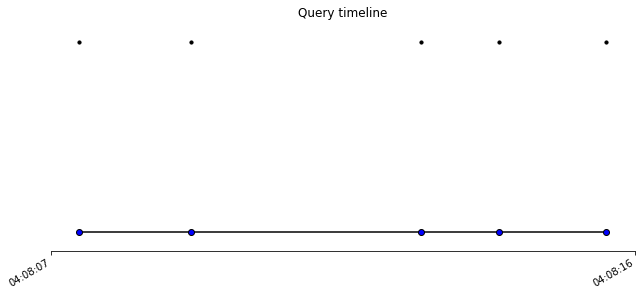

In [41]:

df_miroqueries, df_queries = create_queries_df(boardId)
#print(df_queries.index)
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Query timeline")
levels = df_queries['webpagesVisited']
ax.plot(df_queries.index, np.zeros_like(df_queries.index, dtype='int32'), "-o",color="k", markerfacecolor="b")
ax.scatter(df_miroqueries.index, np.full_like(df_miroqueries.index, 1, dtype='int32'),10,marker="o",color="k")
#ax.vlines(df_queries.index, 0, levels, color="tab:red") 

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.margins(y=0.1)
plt.show()

### Full Timeline Activity

In [42]:
def plot_board_activity(boardId):
    df_miroqueries, df_queries = create_queries_df(boardId)
    df_suggestions = create_suggestions_df(boardId)
    board_df = create_board_df(boardId)
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title="Board Activity timeline for " + boardId + ' (' + boardInfo.filter(items=[boardId], axis=0)['studyType'].iloc[0]+')')
    lines = []
    two_minute = timedelta(minutes=2)
    ax.plot(df_suggestions.index, np.full_like(df_suggestions.index,0, dtype='int32'), "-" ,linestyle='None')
    ax.scatter(df_suggestions.index, np.full_like(df_suggestions.index,1, dtype='int32'), df_suggestions['suggestionCount']*10+15, marker="o",color="w",edgecolors='k', label='Query suggested')
    ax.scatter(df_miroqueries.index, np.full_like(df_miroqueries.index, 3, dtype='int32'), df_miroqueries['webpagesVisited']*10+15,marker="o",color="k",edgecolors='k', label='Query issued from Miro')
    ax.scatter(df_queries.index, np.full_like(df_queries.index, 2, dtype='int32'),df_queries['webpagesVisited']*20+15, marker="o",color="b", edgecolors='k',label='Query issued')
    
    midinterval = pd.DataFrame(board_df['timestamp'])-(pd.DataFrame(board_df['timestamp'])-pd.DataFrame(board_df['timestamp']).shift(1))/2
    board_df.iloc[1:, board_df.columns.get_loc('timestamp')]= midinterval['timestamp'][1:]
    board_df['charactersDiff']= board_df['totalCharacters'].diff()
    #print(board_df)
    for index, item in board_df.iterrows():
        
        if item['addedWidgets']>0 or item['charactersDiff']>=50:
            ax.plot(item['timestamp'], 0, "o",color="g", markeredgecolor='k', label='Note Created on Miro')
        
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(y=0.1)
    
    handles,labels = ax.get_legend_handles_labels()
    handles = [handles[-2], handles[-1], handles[-3], handles[0]]
    labels = [labels[-2], labels[-1], labels[-3], labels[0]]
    ax.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

o9J_lwTEkh4=


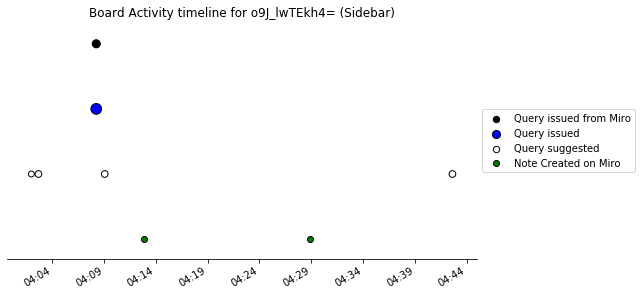

In [43]:
plot_board_activity(boardId)

In [44]:
create_suggestions_df('o9J_ly0Snnk=')

,opened,suggestionsQueried,type,suggestionCount
timestamp,,,,
2021-09-06 19:28:33.744215,3.0,0.0,Topic Task,3
2021-09-06 19:31:57.342935,2.0,0.0,Note,2
2021-09-06 19:34:48.049834,2.0,1.0,Note,2
2021-09-06 19:46:00.499758,3.0,1.0,Note,3
2021-09-06 19:48:23.226903,2.0,0.0,Note,2
2021-09-06 19:49:22.300187,2.0,0.0,Cluster Title,2
2021-09-06 19:50:43.342315,2.0,1.0,Line,2
2021-09-06 19:56:19.678154,1.0,0.0,Note,1
2021-09-06 19:58:34.225399,1.0,0.0,Cluster Title,1


## Plotting activity for all boards

#### Sidebar Condition

o9J_lth9DEA=


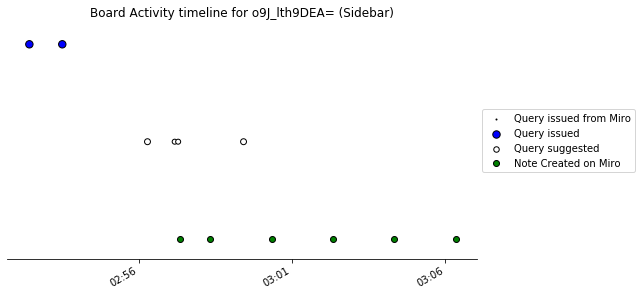

o9J_lthxoK8=


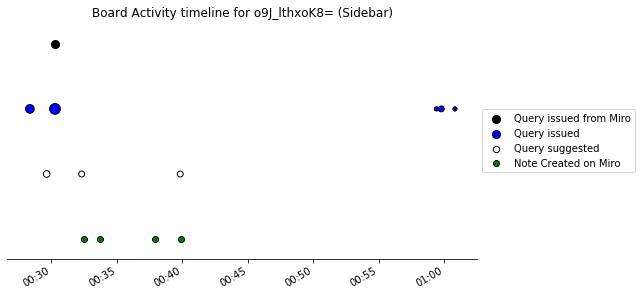

o9J_lwMyp0I=


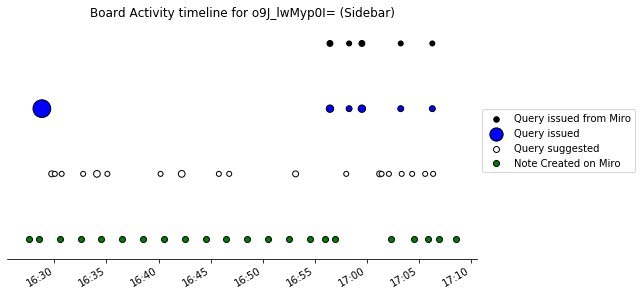

o9J_lwT45UE=


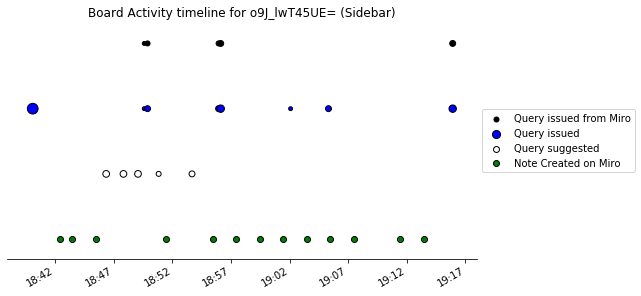

o9J_lwTEkh4=


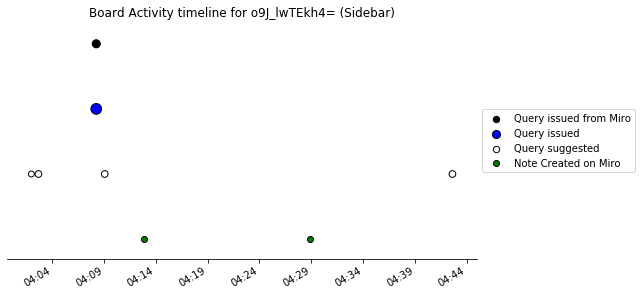

o9J_lwTEnZk=


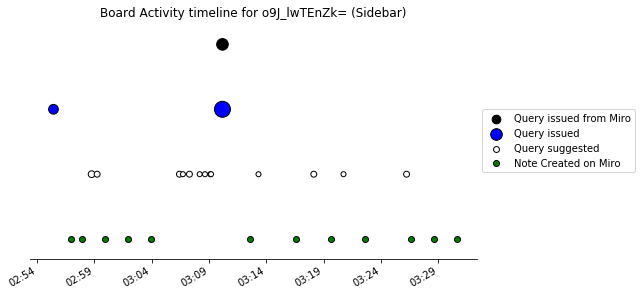

o9J_lwTHmNo=


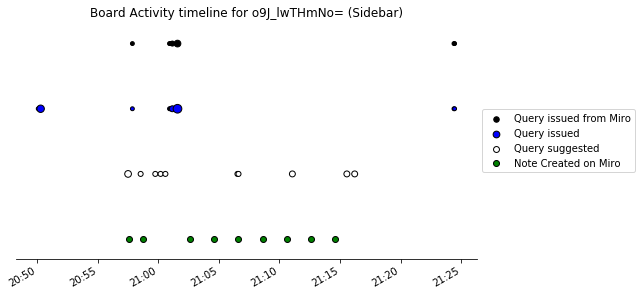

o9J_lwTHmtQ=


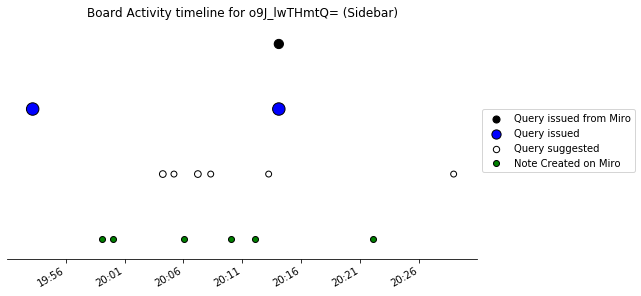

o9J_lwhnitY=


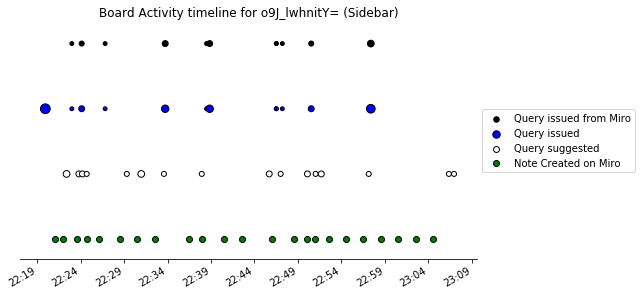

o9J_lwtLWiA=


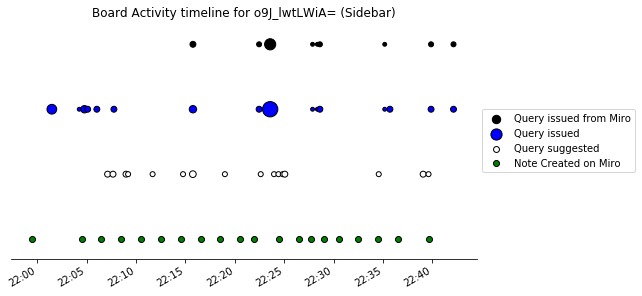

o9J_lxP9EsE=


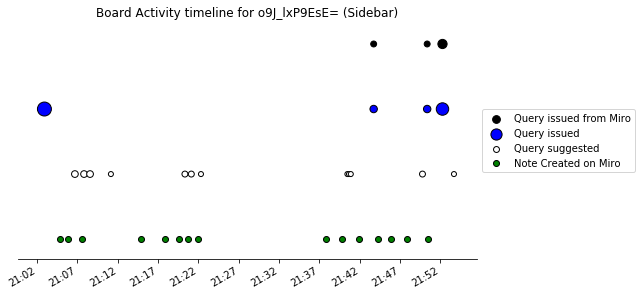

o9J_ly0SnkM=


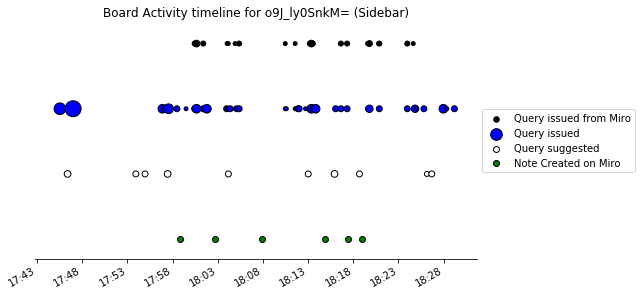

o9J_ly0Snnk=


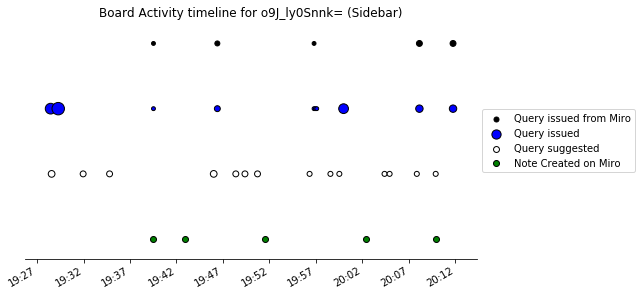

o9J_lyGIfks=


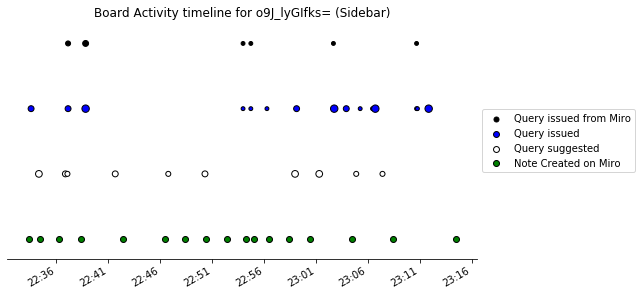

o9J_lyGIfzA=


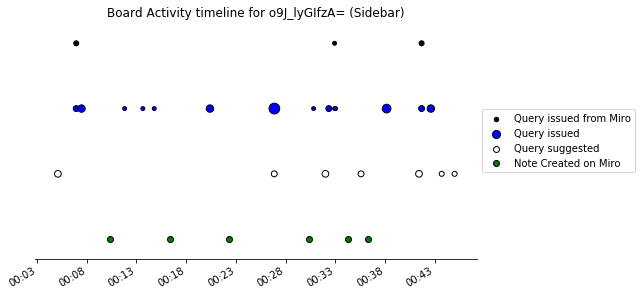

o9J_lyYiAJ0=


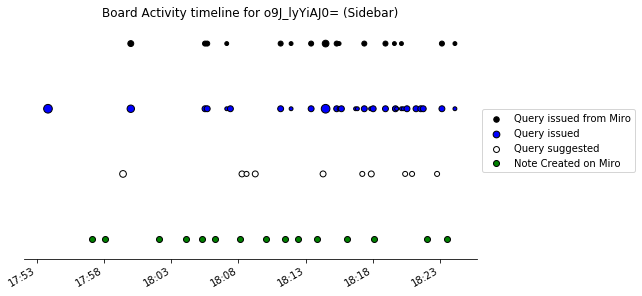

o9J_lzYgHyw=


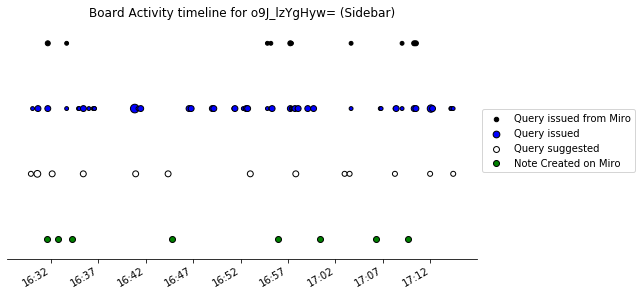

In [45]:
for boardId in sidebarBoards.index.unique():
    plot_board_activity(boardId)

#### On-Board Condition

o9J_lth3zkI=


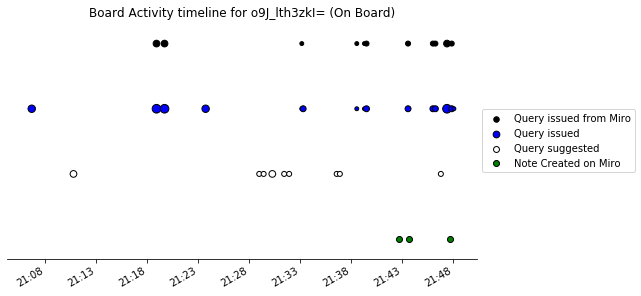

o9J_lthxoSw=


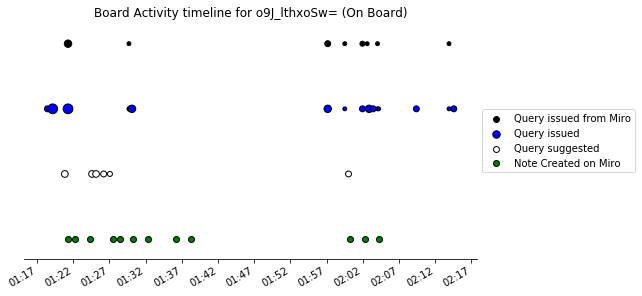

o9J_lwT0kWk=


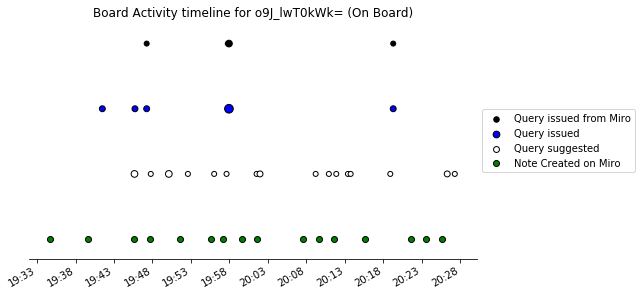

o9J_lwT45Gc=


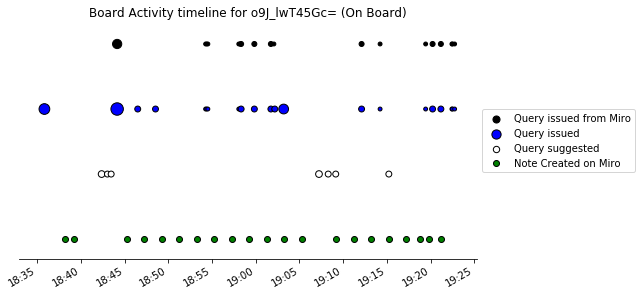

o9J_lwTEnSI=


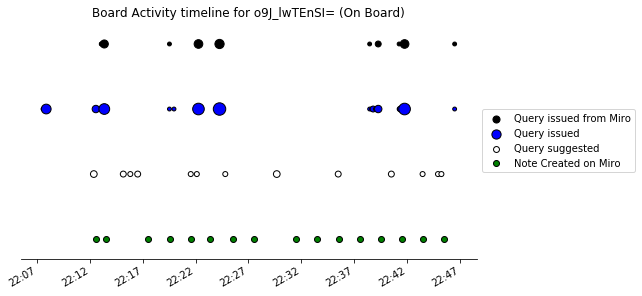

o9J_lwi6_1c=


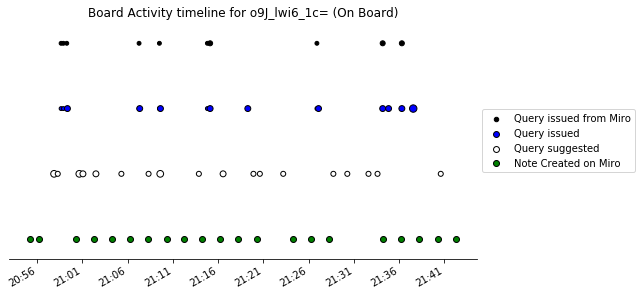

o9J_lwj9wsM=


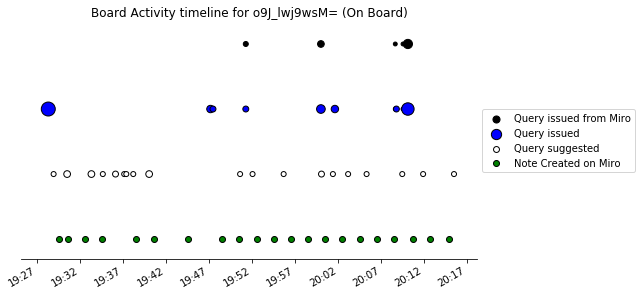

o9J_lwt44k0=


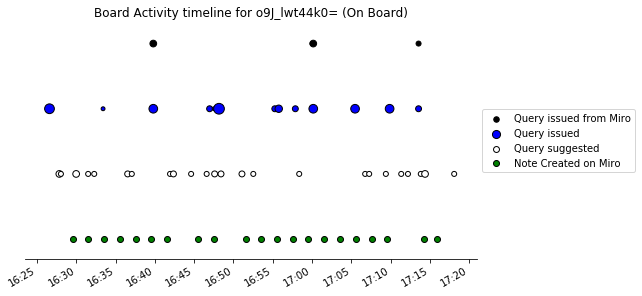

o9J_lwtLWq0=


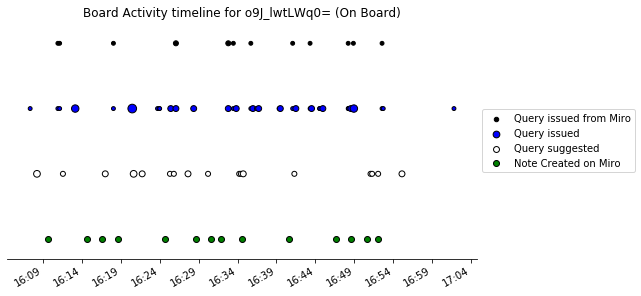

o9J_lwtLZY8=


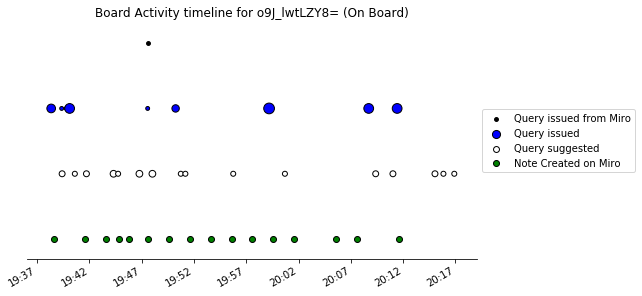

o9J_lx2--OQ=


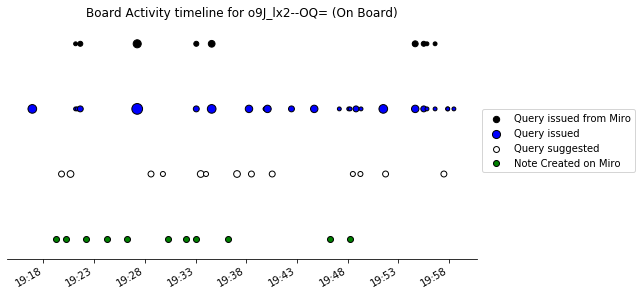

o9J_lxPFjOs=


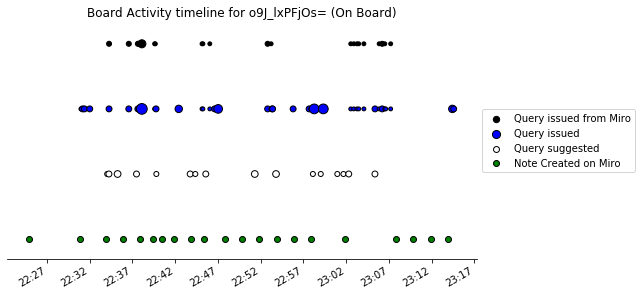

o9J_lxTWUZI=


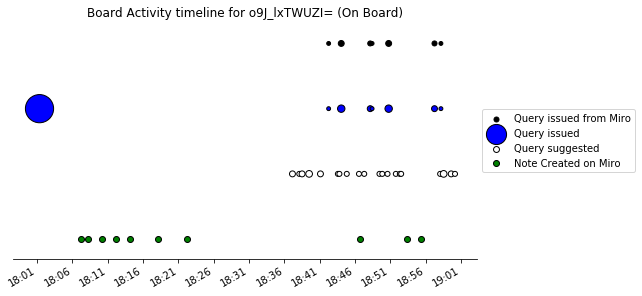

o9J_ly0SnuI=


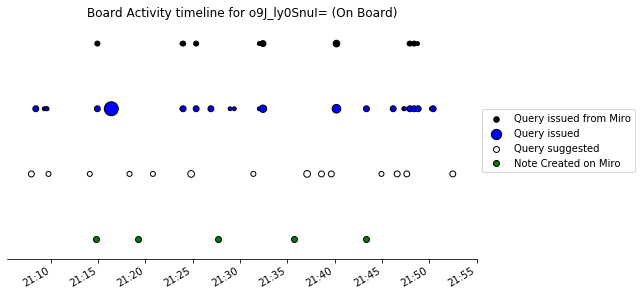

o9J_lyGIeLY=


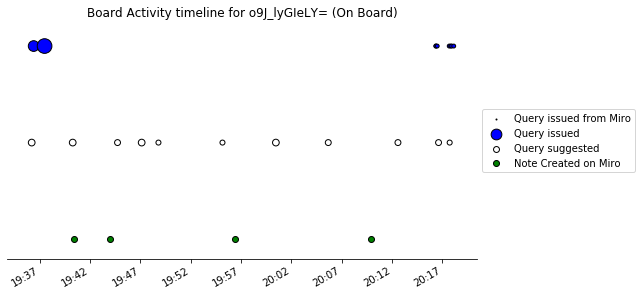

o9J_lyYiALM=


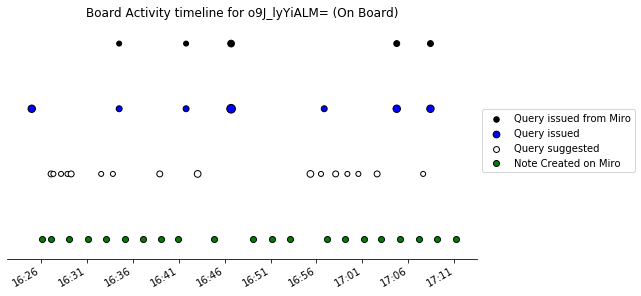

o9J_lzYurAk=


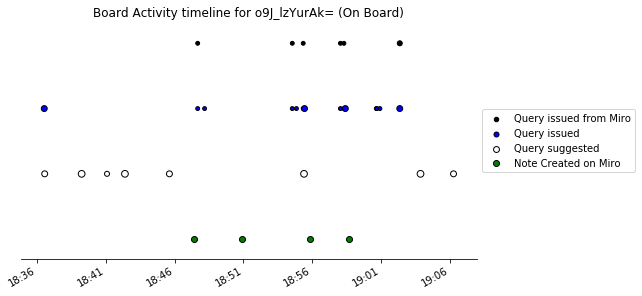

In [46]:
for boardId in onboardBoards.index.unique():
    plot_board_activity(boardId)

## Effect on Sense-making Totals

In [47]:
idx = boardHists.groupby(['boardId'])['timestamp'].transform(max) == boardHists['timestamp']

presentBoards = boardHists[idx]
presentBoards['wordTotal']=0
presentBoards['widgetCount']=0
wordTotals=[]
widgetCounts = []
for row, item in presentBoards.iterrows():
    wordTotal =0
    widgetCount = 0
    for widget in list(eval(item['content'])):
        if widget['createdUserId']in ['3074457360807760467', '3074457358223351101']:
            continue
        text = widget['plainText'] if 'plainText' in widget else ''
        if 'metadata' in widget and client_id in widget['metadata']:
            widgetType = widget['metadata'][client_id]['type']
        elif 'metadata' in widget and client_id2 in widget['metadata']:
            widgetType = widget['metadata'][client_id2]['type']
        else:
            widgetType=widget['type']
        if '🔎︎' in text or '✗' in text:
            continue
        if widget['type']=='LINE':
            continue
        if widgetType not in ['ClusterTitle', 'Cluster']:
            widgetCount+=1
        wordTotal += len(text.split(' '))
    #print(wordTotal)
    wordTotals.append(wordTotal)
    widgetCounts.append(widgetCount)
#     presentBoards.at[key,'wordTotal'] = wordTotal
#     presentBoards.at[key,'widgetCount'] = widgetCount
presentBoards['wordTotal']=wordTotals
presentBoards['widgetCount']=widgetCounts
presentBoards = presentBoards.join(boardInfo, on='boardId')
presentBoards

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,boardId,id,content,timestamp,wordTotal,widgetCount,studyType,topicTask
12,o9J_lth3zkI=,-Mkn_dP_o6R1Go_1PC2C,"[{'bounds': {'bottom': -56.95547439637653, 'he...",2021-09-29T22:04:39.269573,622,34,On Board,Space Travel
22,o9J_lth9DEA=,-Mkogk_ViqQmNXQ8jNXv,"[{'bounds': {'bottom': 108.36248934295736, 'he...",2021-09-30T03:15:20.801243,181,13,Sidebar,Space Travel
40,o9J_lthxoK8=,-MkoELv5rSPNulE1_XYJ,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",2021-09-30T01:06:53.584191,181,13,Sidebar,COVID-19
73,o9J_lthxoSw=,-MkoWh1ucvdL6Raw7V6G,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",2021-09-30T02:27:02.710785,193,26,On Board,COVID-19
107,o9J_lwMyp0I=,-MjomDBtpGVrP8r3cVBJ,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-17T17:23:31.208177,572,27,Sidebar,COVID-19
141,o9J_lwT0kWk=,-MjpTsBU7YG1ZrR8knpt,"[{'bounds': {'bottom': -419.0857650827397, 'he...",2021-09-17T20:38:37.415847,278,8,On Board,Space Travel
175,o9J_lwT45Gc=,-MjzZ3dPym18U33EPqLU,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",2021-09-19T19:37:31.436970,272,27,On Board,COVID-19
204,o9J_lwT45UE=,-Mk3h1fZU1S-f6CP6DEw,"[{'bounds': {'bottom': -171.79086150615348, 'h...",2021-09-20T19:34:48.782584,168,24,Sidebar,COVID-19
226,o9J_lwTEkh4=,-Mk5eFyBCWoQsrChfQT-,"[{'bounds': {'bottom': 106.70499538360457, 'he...",2021-09-21T04:41:55.096957,3,3,Sidebar,COVID-19
278,o9J_lwTEnSI=,-Mk4c0w0LyAoSw0tKgeg,"[{'bounds': {'bottom': 51.55600890140397, 'hei...",2021-09-20T23:52:32.204228,320,24,On Board,Space Travel


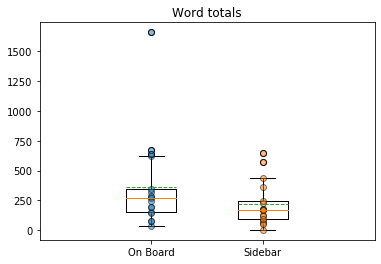

,boardId,id,content,timestamp,wordTotal,widgetCount,studyType,topicTask
12,o9J_lth3zkI=,-Mkn_dP_o6R1Go_1PC2C,"[{'bounds': {'bottom': -56.95547439637653, 'he...",2021-09-29T22:04:39.269573,622,34,On Board,Space Travel
22,o9J_lth9DEA=,-Mkogk_ViqQmNXQ8jNXv,"[{'bounds': {'bottom': 108.36248934295736, 'he...",2021-09-30T03:15:20.801243,181,13,Sidebar,Space Travel
40,o9J_lthxoK8=,-MkoELv5rSPNulE1_XYJ,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",2021-09-30T01:06:53.584191,181,13,Sidebar,COVID-19
73,o9J_lthxoSw=,-MkoWh1ucvdL6Raw7V6G,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",2021-09-30T02:27:02.710785,193,26,On Board,COVID-19
107,o9J_lwMyp0I=,-MjomDBtpGVrP8r3cVBJ,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-17T17:23:31.208177,572,27,Sidebar,COVID-19
141,o9J_lwT0kWk=,-MjpTsBU7YG1ZrR8knpt,"[{'bounds': {'bottom': -419.0857650827397, 'he...",2021-09-17T20:38:37.415847,278,8,On Board,Space Travel
175,o9J_lwT45Gc=,-MjzZ3dPym18U33EPqLU,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",2021-09-19T19:37:31.436970,272,27,On Board,COVID-19
204,o9J_lwT45UE=,-Mk3h1fZU1S-f6CP6DEw,"[{'bounds': {'bottom': -171.79086150615348, 'h...",2021-09-20T19:34:48.782584,168,24,Sidebar,COVID-19
226,o9J_lwTEkh4=,-Mk5eFyBCWoQsrChfQT-,"[{'bounds': {'bottom': 106.70499538360457, 'he...",2021-09-21T04:41:55.096957,3,3,Sidebar,COVID-19
278,o9J_lwTEnSI=,-Mk4c0w0LyAoSw0tKgeg,"[{'bounds': {'bottom': 51.55600890140397, 'hei...",2021-09-20T23:52:32.204228,320,24,On Board,Space Travel


In [48]:
f, ax = plt.subplots()
ax.boxplot(presentBoards[presentBoards['studyType']=='On Board']['wordTotal'],positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal'],positions=[2/3],showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(presentBoards[presentBoards['studyType']=='On Board']['wordTotal']))], presentBoards[presentBoards['studyType']=='On Board']['wordTotal'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal']))], presentBoards[presentBoards['studyType']=='Sidebar']['wordTotal'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Word totals')
plt.show()
presentBoards

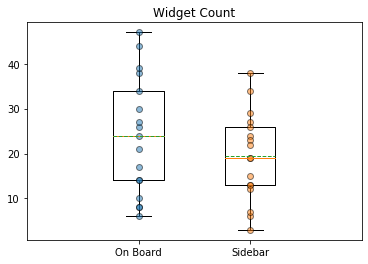

In [49]:
f, ax = plt.subplots()
ax.boxplot(presentBoards[presentBoards['studyType']=='On Board']['widgetCount'],positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount'],positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(presentBoards[presentBoards['studyType']=='On Board']['widgetCount']))], presentBoards[presentBoards['studyType']=='On Board']['widgetCount'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount']))], presentBoards[presentBoards['studyType']=='Sidebar']['widgetCount'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Widget Count')
plt.show()

In [50]:
aggTotalBoard=aggTotalBoard.droplevel('studyType')
aggTotalBoard=presentBoards[['boardId','content', 'wordTotal','widgetCount']].join(aggTotalBoard, on='boardId', how='inner')
aggTotalBoard=aggTotalBoard.set_index('boardId')
aggTotalBoard

,content,wordTotal,widgetCount,studyType,topicTask,suggestionsOffered,suggestionsQueried,queriesNotFromMiro,queriesFromMiro,Cluster,Line,Note,Topic Task
boardId,,,,,,,,,,,,,
o9J_lth3zkI=,"[{'bounds': {'bottom': -56.95547439637653, 'he...",622,34,On Board,Space Travel,13,7.0,4.0,12.0,0.0,0.0,7.0,0.0
o9J_lth9DEA=,"[{'bounds': {'bottom': 108.36248934295736, 'he...",181,13,Sidebar,Space Travel,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0
o9J_lthxoK8=,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",181,13,Sidebar,COVID-19,7,1.0,7.0,1.0,0.0,0.0,1.0,0.0
o9J_lthxoSw=,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",193,26,On Board,COVID-19,14,6.0,12.0,8.0,0.0,0.0,6.0,0.0
o9J_lwMyp0I=,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",572,27,Sidebar,COVID-19,26,5.0,1.0,5.0,0.0,0.0,4.0,1.0
o9J_lwT0kWk=,"[{'bounds': {'bottom': -419.0857650827397, 'he...",278,8,On Board,Space Travel,22,4.0,2.0,4.0,0.0,1.0,3.0,0.0
o9J_lwT45Gc=,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",272,27,On Board,COVID-19,16,14.0,6.0,18.0,0.0,3.0,11.0,0.0
o9J_lwT45UE=,"[{'bounds': {'bottom': -171.79086150615348, 'h...",168,24,Sidebar,COVID-19,12,3.0,3.0,5.0,2.0,0.0,1.0,0.0
o9J_lwTEkh4=,"[{'bounds': {'bottom': 106.70499538360457, 'he...",3,3,Sidebar,COVID-19,11,5.0,0.0,5.0,0.0,0.0,5.0,0.0


## Board activity after user sees a suggestions




In [51]:
suggestionCircleClicked_dict

suggCircleActivity=[]
boardInfo[boardInfo['studyType']=='On Board']
for boardId in boardInfo[boardInfo['studyType']=='On Board'].index:
    if boardId in ['o9J_lyYiALg=','o9J_lwrV0Y8=']:
        continue
    for item in suggestionCircleClicked_dict[boardId].dropna():
        suggCircleActivity.append({"boardId": boardId, "suggOpenedTime": datetime.strptime(item,'%Y-%m-%dT%H:%M:%S.%f')})
    
        

suggActivity = pd.DataFrame(suggCircleActivity).sort_values('suggOpenedTime', axis=0).reset_index(drop=True)
suggActivity['suggIntervalEndTime'] = suggActivity.groupby('boardId')['suggOpenedTime'].shift(-1).fillna(datetime.strptime('2030-01-01T00:00:00.000000','%Y-%m-%dT%H:%M:%S.%f'))
suggActivity['addedWidgets']=0
suggActivity['characterDiff']=0

suggActivity[suggActivity['boardId']=='o9J_lwT45Gc=']

,boardId,suggOpenedTime,suggIntervalEndTime,addedWidgets,characterDiff
222,o9J_lwT45Gc=,2021-09-19 18:44:01.240866,2021-09-19 18:54:10.728839,0,0
223,o9J_lwT45Gc=,2021-09-19 18:54:10.728839,2021-09-19 18:54:18.065129,0,0
224,o9J_lwT45Gc=,2021-09-19 18:54:18.065129,2021-09-19 18:54:26.150228,0,0
225,o9J_lwT45Gc=,2021-09-19 18:54:26.150228,2021-09-19 18:57:56.388663,0,0
226,o9J_lwT45Gc=,2021-09-19 18:57:56.388663,2021-09-19 18:58:05.109626,0,0
227,o9J_lwT45Gc=,2021-09-19 18:58:05.109626,2021-09-19 18:58:13.697926,0,0
228,o9J_lwT45Gc=,2021-09-19 18:58:13.697926,2021-09-19 19:04:05.851793,0,0
229,o9J_lwT45Gc=,2021-09-19 19:04:05.851793,2021-09-19 19:12:01.145443,0,0
230,o9J_lwT45Gc=,2021-09-19 19:12:01.145443,2021-09-19 19:12:13.116410,0,0
231,o9J_lwT45Gc=,2021-09-19 19:12:13.116410,2021-09-19 19:14:06.655686,0,0


In [52]:
webpage_df =pd.read_csv('webpage_df.csv')
for boardId in boardInfo[boardInfo['studyType']=='On Board'].index:
    board_df = create_board_df(boardId)
    board_df['charDiff']=board_df['totalCharacters'].diff()
    webpageboard_df=webpage_df[webpage_df['boardId']==boardId]
    webpageboard_df['timestamp'] = pd.to_datetime(webpageboard_df['timestamp'])
    for key, item in suggActivity[suggActivity['boardId']==boardId].iterrows():
        suggIntervalActivity = board_df[(board_df['timestamp']<item.suggIntervalEndTime) & (board_df['timestamp']>=item.suggOpenedTime)]
        webpageIntervalActivity = webpageboard_df[(webpageboard_df['timestamp']<item.suggIntervalEndTime) & (webpageboard_df['timestamp']>=item.suggOpenedTime)]
        suggActivity.at[key, 'addedWidgets']=suggIntervalActivity['addedWidgets'].sum()
        suggActivity.at[key, 'characterDiff']=suggIntervalActivity['charDiff'].sum()
        suggActivity.at[key, 'webpagesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == False]['isQuery'].count()
        suggActivity.at[key, 'queriesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == True]['isQuery'].count()
suggActivity

o9J_lth3zkI=
o9J_lthxoSw=


C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


o9J_lwT0kWk=
o9J_lwT45Gc=
o9J_lwTEnSI=
o9J_lwi6_1c=
o9J_lwj9wsM=
o9J_lwt44k0=
o9J_lwtLWq0=
o9J_lwtLZY8=
o9J_lx2--OQ=
o9J_lxPFjOs=
o9J_lxTWUZI=
o9J_ly0SnuI=
o9J_lyGIeLY=
o9J_lyYiALM=
o9J_lzYurAk=


,boardId,suggOpenedTime,suggIntervalEndTime,addedWidgets,characterDiff,webpagesOpened,queriesOpened
0,o9J_lzYurAk=,2021-09-03 18:47:25.484276,2021-09-03 18:47:28.787963,0,0,0.0,0.0
1,o9J_lzYurAk=,2021-09-03 18:47:28.787963,2021-09-03 18:54:21.235389,9,-30,0.0,2.0
2,o9J_lzYurAk=,2021-09-03 18:54:21.235389,2021-09-03 18:57:21.836655,1,675,1.0,4.0
3,o9J_lzYurAk=,2021-09-03 18:57:21.836655,2021-09-03 18:57:26.867164,0,0,0.0,0.0
4,o9J_lzYurAk=,2021-09-03 18:57:26.867164,2021-09-03 18:57:29.259117,0,0,0.0,0.0
...,...,...,...,...,...,...,...
323,o9J_lwj9wsM=,2021-10-02 00:09:58.859656,2021-10-02 01:03:51.821911,0,0,0.0,0.0
324,o9J_lwj9wsM=,2021-10-02 01:03:51.821911,2021-10-02 01:05:19.275479,0,0,0.0,0.0
325,o9J_lwj9wsM=,2021-10-02 01:05:19.275479,2021-10-02 01:05:57.255879,0,0,0.0,0.0
326,o9J_lwj9wsM=,2021-10-02 01:05:57.255879,2021-10-02 01:06:13.321469,0,0,0.0,0.0


### Mapping widgets to browser queries

In [53]:
widgets_df =pd.read_csv('widgets.csv')
widgets_df['id']= widgets_df['id'].astype('string')
widgets_df

,board_id,id,timestamp,text,bounds,type
0,o9J_lth3zkI=,3074457364776383547,2021-09-29 21:42:39.248845,NaN,"{'bottom': -56.95547439637653, 'height': 707.3...",IMAGE
1,o9J_lth3zkI=,3074457364844215293,2021-09-29 21:42:39.248845,NaN,"{'bottom': 488.883751851557, 'height': 180, 'l...",IMAGE
2,o9J_lth3zkI=,3074457364843888861,2021-09-29 21:42:39.248845,Voyager,"{'bottom': 291.07418127970703, 'height': 51.59...",TEXT
3,o9J_lth3zkI=,3074457364843888784,2021-09-29 21:42:39.248845,NaN,"{'bottom': 632.605668173259, 'height': 535.175...",SHAPE
4,o9J_lth3zkI=,3074457364843701369,2021-09-29 21:42:39.248845,Transportation,"{'bottom': 196.15278603818928, 'height': 68.57...",TEXT
...,...,...,...,...,...,...
54756,o9J_lzYurAk=,3074457363437014414,2021-09-09 23:07:35.998728,NaN,"{'bottom': 3497.450131579215, 'height': 3017.3...",Cluster
54757,o9J_lzYurAk=,3074457363436856036,2021-09-09 23:07:35.998728,the way each country is being affected,"{'bottom': 2173.4252340465396, 'height': 85.29...",TEXT
54758,o9J_lzYurAk=,3074457363436855852,2021-09-09 23:07:35.998728,"By 2040 (panel B), both the economic losses an...","{'bottom': 1265.0455774774787, 'height': 459.2...",STICKER
54759,o9J_lzYurAk=,3074457363436856547,2021-09-09 23:07:35.998728,NaN,"{'bottom': 3418.237446835442, 'height': 1244.8...",IMAGE


In [54]:
for boardId in boardInfo.index:
    for key, item in browser_df_joined[(browser_df_joined['boardId']==boardId) & (browser_df_joined['clickedFromMiro']==1)].iterrows():
#         print(item['query'])
        relevantSuggestions = suggestion_df_joined[suggestion_df_joined['boardId']==boardId]
        relevantSuggestions=relevantSuggestions[relevantSuggestions['suggestionsQueried']==1]
#         if 'Vaccine transportation' not in item.query:
#             continue
#         print(relevantSuggestions)
        for key2, item2 in relevantSuggestions.iterrows():
            if item2.suggestionText not in item.query:
                relevantSuggestions=relevantSuggestions.drop(index=key2)
#         print(relevantSuggestions)
        relevantSuggestions = relevantSuggestions[relevantSuggestions['timestamp']< item.timestamp]
#         for key2, item2 in relevantSuggestions.iterrows():
#             if item2.status==4 and item2.lastUpdated>item.timestamp:
#                 relevantSuggestions=relevantSuggestions.drop(index=key2)
#         print(relevantSuggestions)
        if len(relevantSuggestions)>0:
            widgettypes=[]
            relevantSuggestions = relevantSuggestions.sort_values('lastUpdated').iloc[0]
#             print(relevantSuggestions)
            parentWidgetA = widgets_df[widgets_df['id']==relevantSuggestions['parentIdA']]
#             print(parentWidgetA)
            parentWidgetA['timestamp'] = pd.to_datetime(parentWidgetA['timestamp'])
            parentWidgetA = parentWidgetA[parentWidgetA['timestamp']<item.timestamp]
            parentWidgetB=widgets_df[widgets_df['id']==relevantSuggestions['parentIdB']]
            parentWidgetB['timestamp'] = pd.to_datetime(parentWidgetB['timestamp'])
            parentWidgetB = parentWidgetB[parentWidgetB['timestamp']<item.timestamp]
            widgetPosition=None
            if relevantSuggestions['parentIdB']!=0 and len(parentWidgetB)!=0:
                #print('yay')
                parentWidgetB = parentWidgetB.sort_values('timestamp',ascending=False).iloc[0]
                widgettypes.append(parentWidgetB.type)
                bounds2 = eval(parentWidgetB.bounds)
                positionX = (bounds['x']+bounds2['x'])/2
                positionY=(bounds['y']+bounds2['y'])/2
                widgetPosition = {'x':positionX, 'y':positionY}
#                 print(widgetPosition)
                #browser_df_joined.at[key, 'parentWidgetBType']=parentWidgetB.type
                #browser_df_joined.at[key, 'parentWidgetBBounds']=parentWidgetB.bounds
            if len(parentWidgetA)!=0:
                parentWidgetA=parentWidgetA.sort_values('timestamp',ascending=False).iloc[0]
                widgettypes.append(parentWidgetA.type)
                bounds = eval(parentWidgetA.bounds)
                #print(bounds)
                if widgetPosition is None:
                    widgetPosition = {'x': bounds['x'], 'y':bounds['y']}
                
#                 print(type(bounds['x']))
#                 print(type(widgetPosition))
#                 print(str(widgetPosition))
                
                browser_df_joined.at[key, 'parentWidgetTypes']=widgettypes
                browser_df_joined.at[key, 'positionX']=widgetPosition['x']
                browser_df_joined.at[key, 'positionY']=widgetPosition['y']
                #browser_df_joined.at[key, 'parentWidgetAType']=parentWidgetA.type
                #browser_df_joined.at[key, 'parentWidgetABounds']=parentWidgetA.bounds
            
            else:
                parentWidgetA = widgets_df[widgets_df['id']==relevantSuggestions['parentIdA']]
                parentWidgetA['timestamp'] = pd.to_datetime(parentWidgetA['timestamp'])
                parentWidgetA=parentWidgetA.sort_values('timestamp',ascending=False).iloc[0]
                widgettypes.append(parentWidgetA.type)
                bounds = eval(parentWidgetA.bounds)
                widgetPosition = {'x': bounds['x'], 'y':bounds['y']}
                browser_df_joined.at[key, 'parentWidgetTypes']=widgettypes
                browser_df_joined.at[key, 'positionX']=widgetPosition['x']
                browser_df_joined.at[key, 'positionY']=widgetPosition['y']
       
browser_df_joined[browser_df_joined['boardId']=='o9J_lth3zkI=']
        


C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff,parentWidgetTypes,positionX,positionY
0,o9J_lth3zkI=,2021-09-29 21:06:39.990358,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,On Board,Space Travel,NaT,NaN,NaN,NaN
1,o9J_lth3zkI=,2021-09-29 21:18:54.440814,NASA%27s Commerical Crew Program,"['""nasa commercial crew program""', '""nasa comm...",NaN,"['Commercial Crew Program SpaceX', 'What is th...",3,1,On Board,Space Travel,0 days 00:12:14.450456,NaN,NaN,NaN
2,o9J_lth3zkI=,2021-09-29 21:19:34.988778,Voyager,"['""voyager crypto""', '""voyager estates""', '""vo...","['Where is Voyager right now?', 'Is Voyager 1 ...","['Voyager crypto', 'Voyager login', 'Voyager T...",0,1,On Board,Space Travel,0 days 00:00:40.547964,SHAPE,1053.423988,-312.417602
3,o9J_lth3zkI=,2021-09-29 21:19:41.735419,Space hotels,"['""space hotel 2027""', '""space hotels of the f...",['How much will it cost to stay in the space h...,"['Space hotel room', 'Inside space hotel', 'Vo...",3,1,On Board,Space Travel,0 days 00:00:06.746641,[SHAPE],1053.423988,-312.417602
4,o9J_lth3zkI=,2021-09-29 21:23:43.626427,Space hotels,"['""space hotel 2027""', '""space hotels of the f...",NaN,NaN,2,0,On Board,Space Travel,0 days 00:04:01.891008,NaN,NaN,NaN
5,o9J_lth3zkI=,2021-09-29 21:33:09.696241,Voyager,"['""voyager crypto""', '""voyager estates""', '""vo...","['Where is Voyager right now?', 'Is Voyager 1 ...","['Voyager crypto', 'Voyager login', 'Voyager T...",0,1,On Board,Space Travel,0 days 00:09:26.069814,[SHAPE],1053.423988,-312.417602
6,o9J_lth3zkI=,2021-09-29 21:33:17.710755,Voyager Futurization of Space Travel,[''],"['What speed is Voyager 1 traveling at?', 'Wha...","['Voyager 1 current position', 'Voyager 1 last...",1,0,On Board,Space Travel,0 days 00:00:08.014514,NaN,NaN,NaN
7,o9J_lth3zkI=,2021-09-29 21:38:33.406144,2015 SPACE Act,"['""2015 space act""', '""space act 2015 pdf""']",NaN,"['SPACE Act of 2015 summary', 'Space resource ...",0,1,On Board,Space Travel,0 days 00:05:15.695389,[SHAPE],1053.423988,-312.417602
8,o9J_lth3zkI=,2021-09-29 21:39:18.561758,FAA Recommended Practices 280 guests and 112 c...,[''],NaN,['FAA pilot and medical certification requirem...,0,1,On Board,Space Travel,0 days 00:00:45.155614,[TEXT],1138.818644,436.008311
9,o9J_lth3zkI=,2021-09-29 21:39:30.680243,Satellite communication Transportation,[''],"['How do satellites help in transportation?', ...",NaN,1,1,On Board,Space Travel,0 days 00:00:12.118485,[TEXT],1983.453678,161.867072


## Board activity after user opens a suggestions

In [55]:
miroQueries_df=browser_df_joined[browser_df_joined['clickedFromMiro']==1]
browser_df_joined['timeIntervalEnd'] = browser_df_joined.groupby('boardId')['timestamp'].shift(-1).fillna(datetime.strptime('2030-01-01T00:00:00.000000','%Y-%m-%dT%H:%M:%S.%f'))
browser_df_joined['addedWidgets']=0
browser_df_joined['characterDiff']=0

for boardId in boardInfo.index:
    board_df = create_board_df(boardId)
    board_df['charDiff']=board_df['totalCharacters'].diff()
    #print(board_df)
    webpageboard_df=webpage_df[webpage_df['boardId']==boardId]
    webpageboard_df['timestamp'] = pd.to_datetime(webpageboard_df['timestamp'])
    for key, item in browser_df_joined[browser_df_joined['boardId']==boardId].iterrows():
        #print(item)
        suggIntervalActivity = board_df[(board_df['timestamp']<item.timeIntervalEnd) & (board_df['timestamp']>=item.timestamp)]
        webpageIntervalActivity = webpageboard_df[(webpageboard_df['timestamp']<item.timeIntervalEnd) & (webpageboard_df['timestamp']>=item.timestamp)]
        positionX = item['positionX'] if 'positionX' in item else None
        positionY = item['positionY'] if 'positionY' in item else None
        totalDistance=None
        numOfWidgets=None
#         print(item)
        if item['clickedFromMiro']==1 and item['addedWidgets']==0:
            totalDistance=0
            numOfWidgets=0
            for bounds in suggIntervalActivity['bounds']:
                for bound in bounds:
                    totalDistance +=math.sqrt((positionX-bound['x'])**2 + (positionY-bound['y'])**2)
                    numOfWidgets+=1
        
        browser_df_joined.at[key, 'averageDistance'] = None if totalDistance==0 or totalDistance is None else totalDistance/numOfWidgets
        browser_df_joined.at[key, 'addedWidgets']=suggIntervalActivity['addedWidgets'].sum()
        browser_df_joined.at[key, 'characterDiff']=suggIntervalActivity['charDiff'].sum()
        browser_df_joined.at[key, 'webpagesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == False]['isQuery'].count()
browser_df_joined[browser_df_joined['boardId']=='o9J_lth9DEA=']

o9J_lth3zkI=
o9J_lth9DEA=
o9J_lthxoK8=


C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


o9J_lthxoSw=
o9J_lwMyp0I=
o9J_lwT0kWk=
o9J_lwT45Gc=
o9J_lwT45UE=
o9J_lwTEkh4=
o9J_lwTEnSI=
o9J_lwTEnZk=
o9J_lwTHmNo=
o9J_lwTHmtQ=
o9J_lwhnitY=
o9J_lwi6_1c=
o9J_lwj9wsM=
o9J_lwt44k0=
o9J_lwtLWiA=
o9J_lwtLWq0=
o9J_lwtLZY8=
o9J_lx2--OQ=
o9J_lxP9EsE=
o9J_lxPFjOs=
o9J_lxTWUZI=
o9J_ly0SnkM=
o9J_ly0Snnk=
o9J_ly0SnuI=
o9J_lyGIeLY=
o9J_lyGIfks=
o9J_lyGIfzA=
o9J_lyYiAJ0=
o9J_lyYiALM=
o9J_lzYgHyw=
o9J_lzYurAk=


,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff,parentWidgetTypes,positionX,positionY,timeIntervalEnd,addedWidgets,characterDiff,averageDistance,webpagesOpened
16,o9J_lth9DEA=,2021-09-30 02:52:26.208166,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel,NaT,NaN,NaN,NaN,2021-09-30 02:53:30.668070,0,0,NaN,2.0
17,o9J_lth9DEA=,2021-09-30 02:53:30.668070,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel,0 days 00:01:04.459904,NaN,NaN,NaN,2030-01-01 00:00:00.000000,16,887,NaN,2.0


In [56]:
miroQueries_df['timeIntervalEnd'] = miroQueries_df.groupby('boardId')['timestamp'].shift(-1).fillna(datetime.strptime('2030-01-01T00:00:00.000000','%Y-%m-%dT%H:%M:%S.%f'))
miroQueries_df['addedWidgets']=0
miroQueries_df['characterDiff']=0
for boardId in boardInfo.index:
    board_df = create_board_df(boardId)
    board_df['charDiff']=board_df['totalCharacters'].diff()
    #print(board_df)
    webpageboard_df=webpage_df[webpage_df['boardId']==boardId]
    webpageboard_df['timestamp'] = pd.to_datetime(webpageboard_df['timestamp'])
    for key, item in miroQueries_df[miroQueries_df['boardId']==boardId].iterrows():
        suggIntervalActivity = board_df[(board_df['timestamp']<item.timeIntervalEnd) & (board_df['timestamp']>=item.timestamp)]
        webpageIntervalActivity = webpageboard_df[(webpageboard_df['timestamp']<item.timeIntervalEnd) & (webpageboard_df['timestamp']>=item.timestamp)]
        positionX = item['positionX']
        positionY = item['positionY']
        totalDistance=None
        numOfWidgets=None
        if item['clickedFromMiro']==1 and item['addedWidgets']==0:
            totalDistance=0
            numOfWidgets=0
            for bounds in suggIntervalActivity['bounds']:
                for bound in bounds:
                    totalDistance +=math.sqrt((positionX-bound['x'])**2 + (positionY-bound['y'])**2)
                    numOfWidgets+=1
        miroQueries_df.at[key, 'averageDistance'] = None if totalDistance==0 or totalDistance is None else totalDistance/numOfWidgets
        miroQueries_df.at[key, 'addedWidgets']=suggIntervalActivity['addedWidgets'].sum()
        miroQueries_df.at[key, 'characterDiff']=suggIntervalActivity['charDiff'].sum()
        miroQueries_df.at[key, 'webpagesOpened'] = webpageIntervalActivity[webpageIntervalActivity['isQuery'] == False]['isQuery'].count()
miroQueries_df

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

o9J_lth3zkI=
o9J_lth9DEA=
o9J_lthxoK8=
o9J_lthxoSw=
o9J_lwMyp0I=
o9J_lwT0kWk=
o9J_lwT45Gc=
o9J_lwT45UE=
o9J_lwTEkh4=
o9J_lwTEnSI=
o9J_lwTEnZk=
o9J_lwTHmNo=
o9J_lwTHmtQ=
o9J_lwhnitY=
o9J_lwi6_1c=
o9J_lwj9wsM=
o9J_lwt44k0=
o9J_lwtLWiA=
o9J_lwtLWq0=
o9J_lwtLZY8=
o9J_lx2--OQ=
o9J_lxP9EsE=
o9J_lxPFjOs=
o9J_lxTWUZI=
o9J_ly0SnkM=
o9J_ly0Snnk=
o9J_ly0SnuI=
o9J_lyGIeLY=
o9J_lyGIfks=
o9J_lyGIfzA=
o9J_lyYiAJ0=
o9J_lyYiALM=
o9J_lzYgHyw=
o9J_lzYurAk=


,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff,parentWidgetTypes,positionX,positionY,timeIntervalEnd,addedWidgets,characterDiff,averageDistance,webpagesOpened
1,o9J_lth3zkI=,2021-09-29 21:18:54.440814,NASA%27s Commerical Crew Program,"['""nasa commercial crew program""', '""nasa comm...",NaN,"['Commercial Crew Program SpaceX', 'What is th...",3,1,On Board,Space Travel,0 days 00:12:14.450456,NaN,NaN,NaN,2021-09-29 21:19:34.988778,0,0,NaN,3.0
2,o9J_lth3zkI=,2021-09-29 21:19:34.988778,Voyager,"['""voyager crypto""', '""voyager estates""', '""vo...","['Where is Voyager right now?', 'Is Voyager 1 ...","['Voyager crypto', 'Voyager login', 'Voyager T...",0,1,On Board,Space Travel,0 days 00:00:40.547964,SHAPE,1053.423988,-312.417602,2021-09-29 21:19:41.735419,0,0,NaN,0.0
3,o9J_lth3zkI=,2021-09-29 21:19:41.735419,Space hotels,"['""space hotel 2027""', '""space hotels of the f...",['How much will it cost to stay in the space h...,"['Space hotel room', 'Inside space hotel', 'Vo...",3,1,On Board,Space Travel,0 days 00:00:06.746641,[SHAPE],1053.423988,-312.417602,2021-09-29 21:33:09.696241,0,0,NaN,5.0
5,o9J_lth3zkI=,2021-09-29 21:33:09.696241,Voyager,"['""voyager crypto""', '""voyager estates""', '""vo...","['Where is Voyager right now?', 'Is Voyager 1 ...","['Voyager crypto', 'Voyager login', 'Voyager T...",0,1,On Board,Space Travel,0 days 00:09:26.069814,[SHAPE],1053.423988,-312.417602,2021-09-29 21:38:33.406144,0,0,NaN,1.0
7,o9J_lth3zkI=,2021-09-29 21:38:33.406144,2015 SPACE Act,"['""2015 space act""', '""space act 2015 pdf""']",NaN,"['SPACE Act of 2015 summary', 'Space resource ...",0,1,On Board,Space Travel,0 days 00:05:15.695389,[SHAPE],1053.423988,-312.417602,2021-09-29 21:39:18.561758,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,o9J_lzYurAk=,2021-09-03 18:54:33.114790,Air pollution,"['""air pollution control district""', '""air pol...","['What are main causes of air pollution?', 'Wh...","['Air pollution causes', 'Effects of air pollu...",0,1,On Board,COVID-19,0 days 00:06:22.539964,"[TEXT, TEXT]",965.883288,614.421503,2021-09-03 18:55:20.751356,0,0,NaN,0.0
569,o9J_lzYurAk=,2021-09-03 18:55:20.751356,Plastic pollution,"['""plastic pollution in the ocean""', '""plastic...","['What are the effects of plastic pollution?',...","['Plastic pollution facts', 'Plastic pollution...",0,1,On Board,COVID-19,0 days 00:00:29.542032,"[TEXT, TEXT]",934.343136,757.279839,2021-09-03 18:58:03.162211,1,675,584.277201,1.0
571,o9J_lzYurAk=,2021-09-03 18:58:03.162211,Municipal solid waste ENVIRONMENT,"['""municipal solid waste environmental impact""...",['How does municipal solid waste affect the en...,"['Municipal solid waste examples', 'Municipal ...",0,1,On Board,COVID-19,0 days 00:02:36.661407,[ClusterTitle],2039.732004,428.522487,2021-09-03 18:58:18.340120,0,0,NaN,0.0
572,o9J_lzYurAk=,2021-09-03 18:58:18.340120,Recycling Programs ENVIRONMENT,"['""recycling for the environment""']",['How do recycling programs help the environme...,"['Is recycling good for the environment', 'Eco...",0,1,On Board,COVID-19,0 days 00:00:15.177909,[ClusterTitle],2039.732004,428.522487,2021-09-03 19:02:21.974397,1,175,577.329090,1.0


### Positions of widgets after querying suggestions

In [57]:
browser_df_joined[browser_df_joined['boardId']=='o9J_lth9DEA=']

,boardId,timestamp,query,autocomplete,people_also_ask,related_searches,webpagesVisited,clickedFromMiro,studyType,topicTask,time_diff,parentWidgetTypes,positionX,positionY,timeIntervalEnd,addedWidgets,characterDiff,averageDistance,webpagesOpened
16,o9J_lth9DEA=,2021-09-30 02:52:26.208166,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel,NaT,NaN,NaN,NaN,2021-09-30 02:53:30.668070,0,0,NaN,2.0
17,o9J_lth9DEA=,2021-09-30 02:53:30.668070,futurization of space travel,[''],"['What are the main dangers of space travel?',...","['Space travel history', 'Space exploration es...",2,0,Sidebar,Space Travel,0 days 00:01:04.459904,NaN,NaN,NaN,2030-01-01 00:00:00.000000,16,887,NaN,2.0


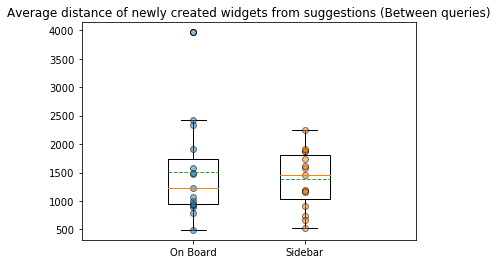

In [58]:
f, ax = plt.subplots()
ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean().dropna(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean().dropna(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean()))], browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean()))], browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Average distance of newly created widgets from suggestions (Between queries)')
plt.show()


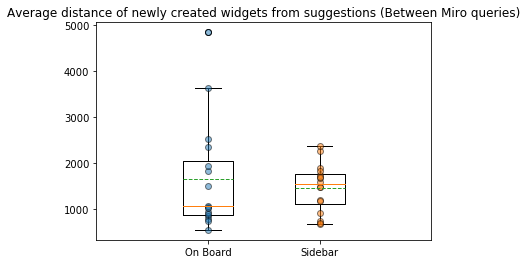

In [59]:
f, ax = plt.subplots()
ax.boxplot(miroQueries_df[miroQueries_df['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean().dropna(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(miroQueries_df[miroQueries_df['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean().dropna(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(miroQueries_df[miroQueries_df['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean()))], miroQueries_df[miroQueries_df['studyType']=='On Board'].groupby('boardId')['averageDistance'].mean(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(miroQueries_df[miroQueries_df['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean()))], miroQueries_df[miroQueries_df['studyType']=='Sidebar'].groupby('boardId')['averageDistance'].mean(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Average distance of newly created widgets from suggestions (Between Miro queries)')
plt.show()
aggTotalBoard=aggTotalBoard.join(miroQueries_df.groupby('boardId')['averageDistance'].mean().dropna())

### Types of widgets added after querying suggestions

In [60]:
addedWidgets=pd.DataFrame()
for boardId in boardInfo.index:
    widgets=[]
    board_df = create_board_df(boardId)
    for widgetTypes in board_df['widgetTypes']:
        for widgetType in widgetTypes:
            if widgetType=='Line':
                continue
            widgetGroup = 'Sensemaking Widgets' if widgetType in ['Cluster', 'ClusterTitle', 'LINE'] else 'Information Widgets'
            addedWidgets=addedWidgets.append({'boardId': boardId, 'widgetType': widgetType, 'widgetGroup': widgetGroup}, ignore_index=True)
addedWidgets['count']=1

addedWidgets = addedWidgets.join(boardInfo, on='boardId',how='inner')
addedWidgetsTypes = pd.pivot_table(addedWidgets, values='count', index=['studyType'], columns='widgetGroup', aggfunc='sum', fill_value=0)

            
            

# f, ax = plt.subplots()
# ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(),positions=[1/3])
# ax.boxplot(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(),positions=[2/3])
# ax.plot([1/3  for x in range(len(browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='On Board'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
# ax.plot([2/3 for x in range(len(browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum()))], browser_df_joined[browser_df_joined['studyType']=='Sidebar'].groupby('boardId')['totalDistance'].sum(), 'o', markeredgecolor='k', alpha=0.5)
# plt.xlim([0, 1])
# ax.set_xticks([1/3, 2/3])
# ax.set_xticklabels(['On Board', 'Sidebar'])
# ax.set_title('Total distance of newly created widgets from suggestions')
# plt.show()

o9J_lth3zkI=
o9J_lth9DEA=
o9J_lthxoK8=
o9J_lthxoSw=
o9J_lwMyp0I=
o9J_lwT0kWk=
o9J_lwT45Gc=
o9J_lwT45UE=
o9J_lwTEkh4=
o9J_lwTEnSI=
o9J_lwTEnZk=
o9J_lwTHmNo=
o9J_lwTHmtQ=
o9J_lwhnitY=
o9J_lwi6_1c=
o9J_lwj9wsM=
o9J_lwt44k0=
o9J_lwtLWiA=
o9J_lwtLWq0=
o9J_lwtLZY8=
o9J_lx2--OQ=
o9J_lxP9EsE=
o9J_lxPFjOs=
o9J_lxTWUZI=
o9J_ly0SnkM=
o9J_ly0Snnk=
o9J_ly0SnuI=
o9J_lyGIeLY=
o9J_lyGIfks=
o9J_lyGIfzA=
o9J_lyYiAJ0=
o9J_lyYiALM=
o9J_lzYgHyw=
o9J_lzYurAk=


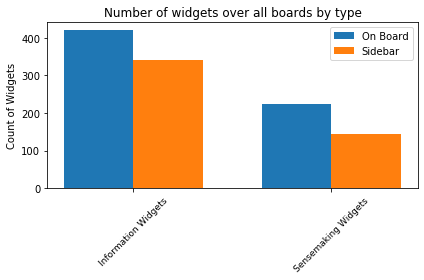

In [61]:
fig, ax = plt.subplots()
x = np.arange(len(addedWidgetsTypes.columns)) 
width = 0.35
addedWidgetsTypesList = addedWidgetsTypes.values.tolist()
rects1 = ax.bar(x - width/2, addedWidgetsTypesList[0], width, label='On Board')
rects2 = ax.bar(x + width/2, addedWidgetsTypesList[1], width, label='Sidebar')
ax.set_ylabel('Count of Widgets')
ax.set_title('Number of widgets over all boards by type')
ax.set_xticks(x)
ax.set_xticklabels(addedWidgetsTypes.columns, rotation=45, size=9)
ax.legend()

fig.tight_layout()
plt.show()

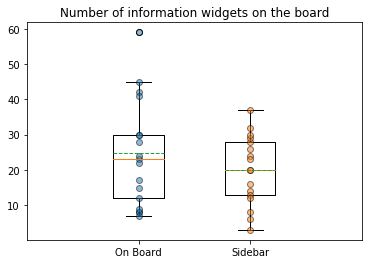

In [62]:
f, ax = plt.subplots()
ax.boxplot(addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum()))], addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum()))], addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Number of information widgets on the board')
plt.show()
aggTotalBoard=aggTotalBoard.join(addedWidgets[addedWidgets['widgetGroup']=='Information Widgets'].groupby('boardId')['count'].sum())
aggTotalBoard=aggTotalBoard.rename(columns={'count': 'Information Widgets'})

In [63]:
aggTotalBoard

,content,wordTotal,widgetCount,studyType,topicTask,suggestionsOffered,suggestionsQueried,queriesNotFromMiro,queriesFromMiro,Cluster,Line,Note,Topic Task,averageDistance,Information Widgets
boardId,,,,,,,,,,,,,,,
o9J_lth3zkI=,"[{'bounds': {'bottom': -56.95547439637653, 'he...",622,34,On Board,Space Travel,13,7.0,4.0,12.0,0.0,0.0,7.0,0.0,929.868295,30
o9J_lth9DEA=,"[{'bounds': {'bottom': 108.36248934295736, 'he...",181,13,Sidebar,Space Travel,6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,14
o9J_lthxoK8=,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",181,13,Sidebar,COVID-19,7,1.0,7.0,1.0,0.0,0.0,1.0,0.0,1463.426123,13
o9J_lthxoSw=,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",193,26,On Board,COVID-19,14,6.0,12.0,8.0,0.0,0.0,6.0,0.0,540.146920,23
o9J_lwMyp0I=,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",572,27,Sidebar,COVID-19,26,5.0,1.0,5.0,0.0,0.0,4.0,1.0,736.738448,28
o9J_lwT0kWk=,"[{'bounds': {'bottom': -419.0857650827397, 'he...",278,8,On Board,Space Travel,22,4.0,2.0,4.0,0.0,1.0,3.0,0.0,2341.642387,8
o9J_lwT45Gc=,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",272,27,On Board,COVID-19,16,14.0,6.0,18.0,0.0,3.0,11.0,0.0,1039.407505,28
o9J_lwT45UE=,"[{'bounds': {'bottom': -171.79086150615348, 'h...",168,24,Sidebar,COVID-19,12,3.0,3.0,5.0,2.0,0.0,1.0,0.0,2257.548216,26
o9J_lwTEkh4=,"[{'bounds': {'bottom': 106.70499538360457, 'he...",3,3,Sidebar,COVID-19,11,5.0,0.0,5.0,0.0,0.0,5.0,0.0,1744.014473,3


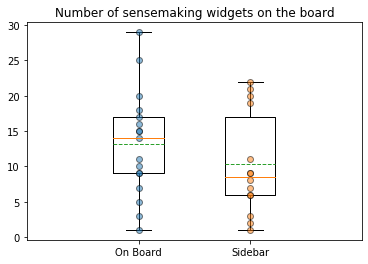

In [64]:
f, ax = plt.subplots()
ax.boxplot(addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum()))], addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='On Board')].groupby('boardId')['count'].sum(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum()))], addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['studyType']=='Sidebar')].groupby('boardId')['count'].sum(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Number of sensemaking widgets on the board')
plt.show()
aggTotalBoard=aggTotalBoard.join(addedWidgets[addedWidgets['widgetGroup']=='Sensemaking Widgets'].groupby('boardId')['count'].sum())
aggTotalBoard=aggTotalBoard.rename(columns={'count': 'Sensemaking Widgets'})

o9J_lth3zkI=


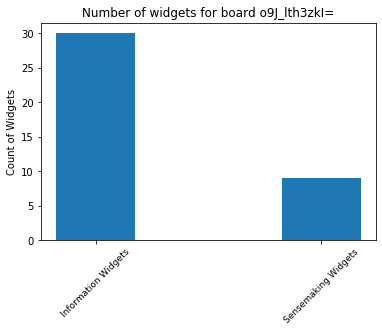

o9J_lthxoSw=


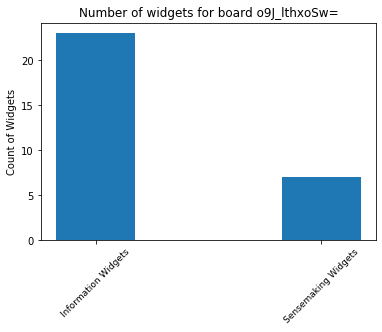

o9J_lwT0kWk=


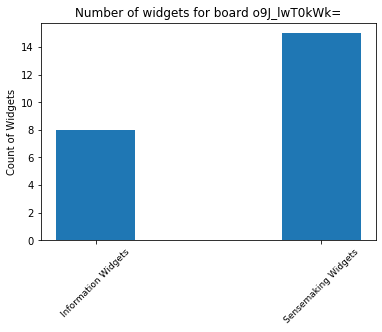

o9J_lwT45Gc=


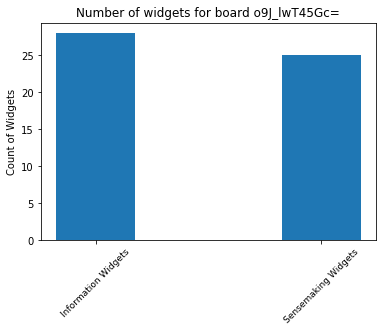

o9J_lwTEnSI=


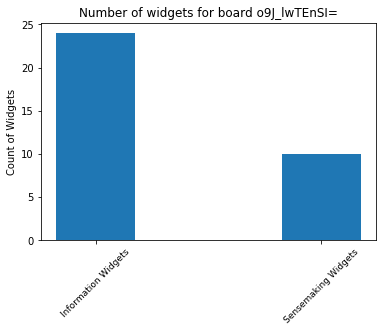

o9J_lwi6_1c=


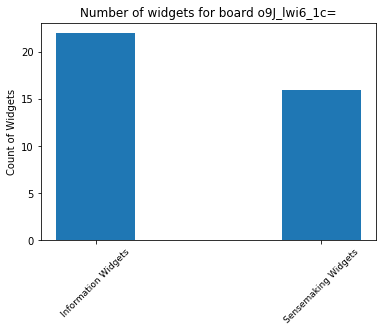

o9J_lwj9wsM=


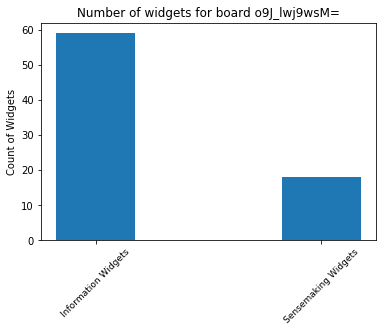

o9J_lwt44k0=


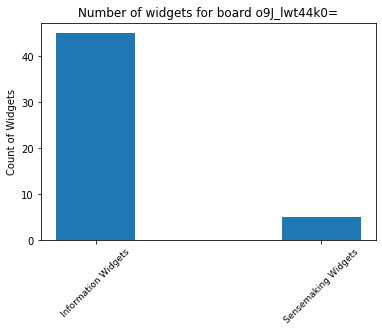

o9J_lwtLWq0=


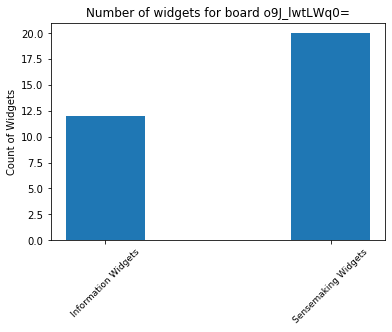

o9J_lwtLZY8=


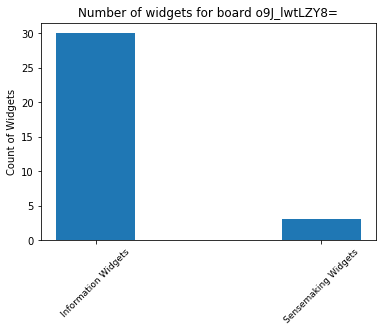

o9J_lx2--OQ=


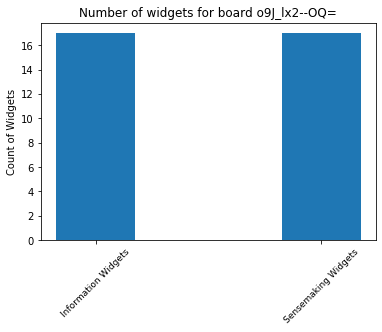

o9J_lxPFjOs=


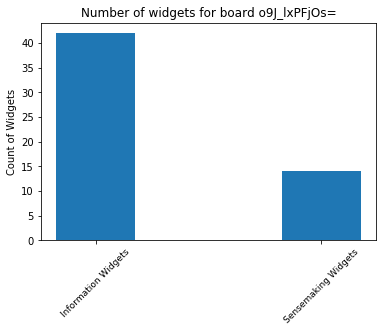

o9J_lxTWUZI=


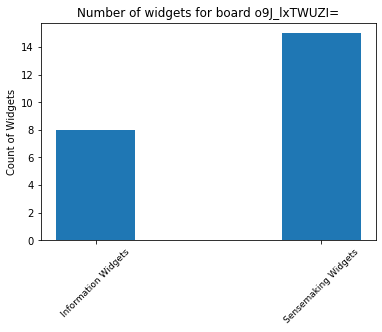

o9J_ly0SnuI=


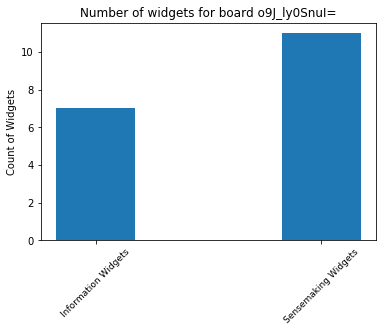

o9J_lyGIeLY=


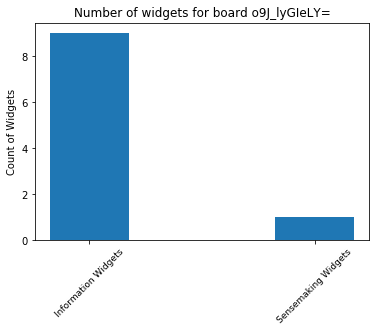

o9J_lyYiALM=


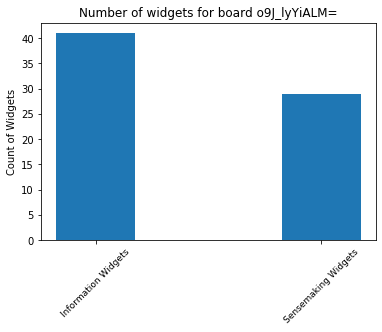

o9J_lzYurAk=


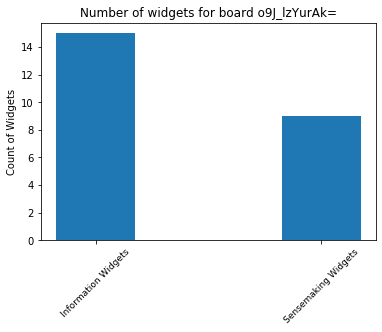

In [65]:
for boardId in onboardBoards.index.unique():
    f, ax = plt.subplots()
    infoWidgets = addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['boardId']==boardId)].groupby('boardId')['count'].sum()
    senseWidgets = addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['boardId']==boardId)].groupby('boardId')['count'].sum()
    print(boardId)
    rects = ax.bar([0, 1], [infoWidgets.iloc[0] if len(infoWidgets)!=0 else 0, senseWidgets.iloc[0] if len(senseWidgets)!=0 else 0], width, label='Information Widgets')
    #rects2 = ax.bar(1, senseWidgets, width, label='Sensemaking Widgets')
    ax.set_ylabel('Count of Widgets')
    ax.set_title('Number of widgets for board ' + boardId)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Information Widgets', 'Sensemaking Widgets'], rotation=45, size=9)

    plt.show()
    

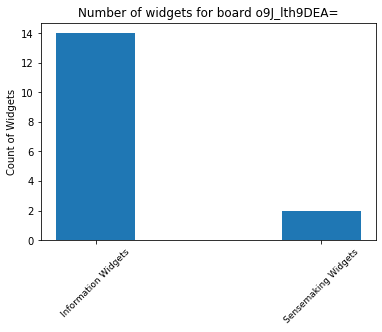

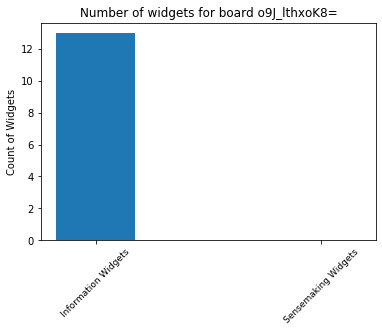

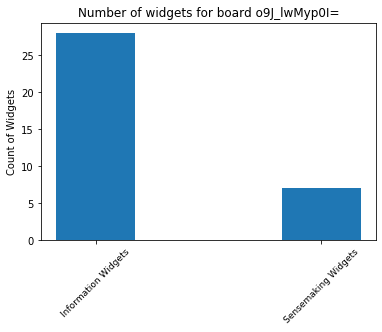

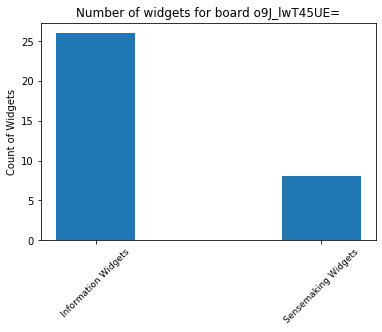

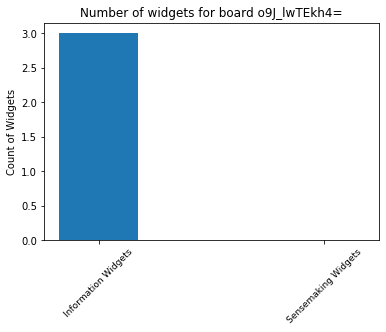

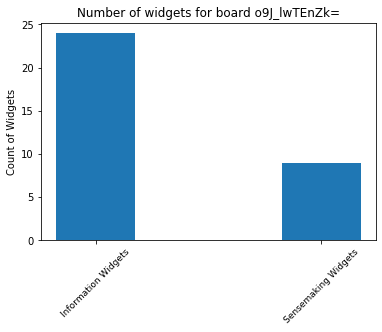

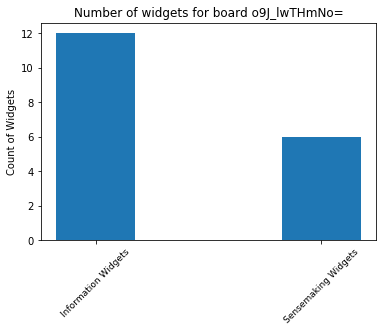

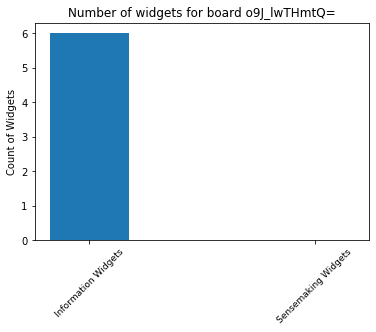

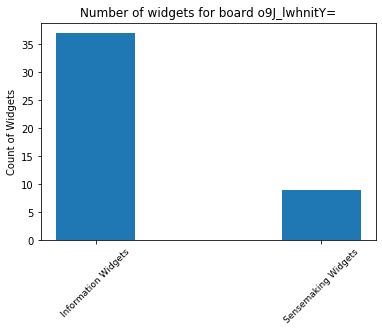

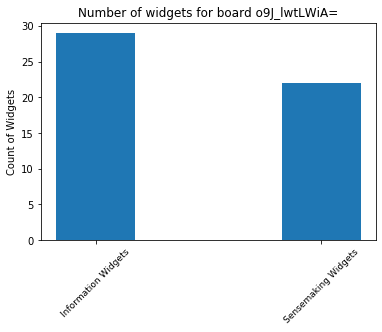

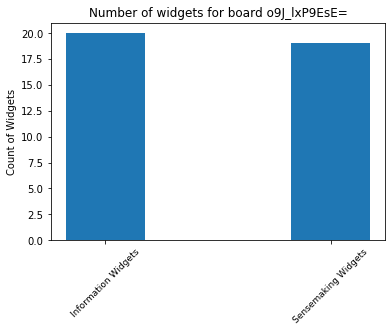

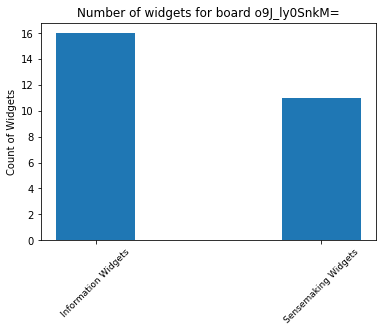

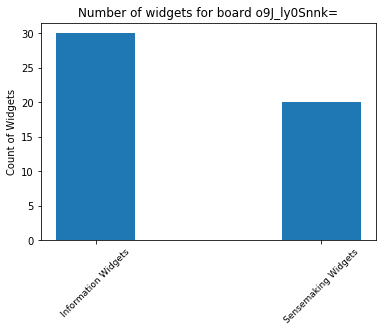

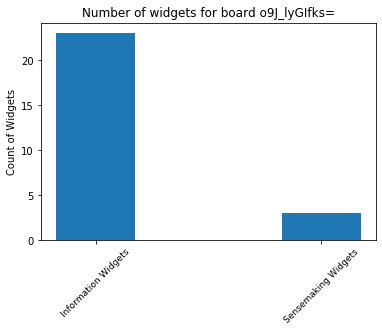

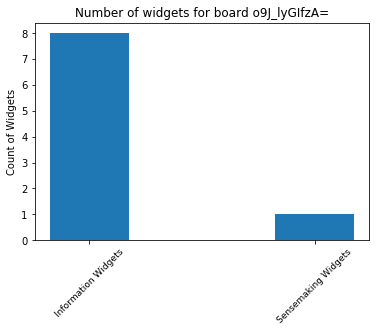

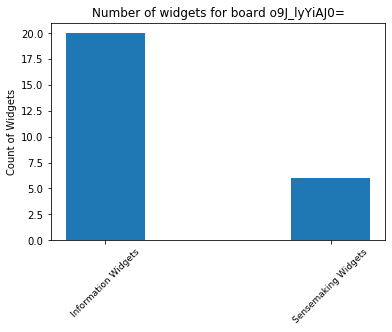

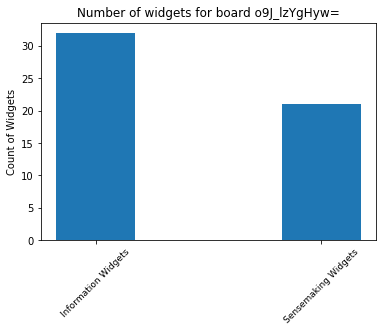

In [66]:
for boardId in sidebarBoards.index.unique():
    f, ax = plt.subplots()
    infoWidgets = addedWidgets[(addedWidgets['widgetGroup']=='Information Widgets') & (addedWidgets['boardId']==boardId)].groupby('boardId')['count'].sum()
    senseWidgets = addedWidgets[(addedWidgets['widgetGroup']=='Sensemaking Widgets') & (addedWidgets['boardId']==boardId)].groupby('boardId')['count'].sum()
    #print(infoWidgets, senseWidgets)
    if len(infoWidgets)==0 and len(senseWidgets)==0:
        rects = ax.bar([0, 1], [0 , 0], width, label='Information Widgets')
    elif len(infoWidgets)==0:
        rects = ax.bar([0, 1], [0, senseWidgets.iloc[0]], width, label='Information Widgets')
    elif len(senseWidgets)==0:
        rects = ax.bar([0, 1], [infoWidgets.iloc[0], 0], width, label='Information Widgets')
    else:
        rects = ax.bar([0, 1], [infoWidgets.iloc[0], senseWidgets.iloc[0]], width, label='Information Widgets')
    #rects2 = ax.bar(1, senseWidgets, width, label='Sensemaking Widgets')
    ax.set_ylabel('Count of Widgets')
    ax.set_title('Number of widgets for board ' + boardId)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Information Widgets', 'Sensemaking Widgets'], rotation=45, size=9)

    plt.show()

## Quantity of Sensemaking

### Focus

In [67]:
clusterDf =pd.DataFrame()

for key, item in presentBoards.iterrows():
    #print(item['boardId'])
    widgets = list(eval(item['content']))
    #print(widgets)
    for widget in widgets:
        if 'metadata' in widget and client_id in widget['metadata']:
            widgetType = widget['metadata'][client_id]['type']
        elif 'metadata' in widget and client_id2 in widget['metadata']:
            widgetType = widget['metadata'][client_id2]['type']
        elif widget['type']=='SHAPE' and 'style' in widget and widget['style']['borderStyle']==1 and widget['style']['shapeType']==7:
            widgetType='Cluster'
        else:
            widgetType = widget['type']
        if widgetType=='Cluster':
            #print('yes')
            clusterDf=clusterDf.append({'boardId': item['boardId'], 'bounds': widget['bounds'], 'studyType': item['studyType']}, ignore_index=True)
            
widgetsWithinClusters = pd.DataFrame()

for key, item in presentBoards.iterrows():
    widgets = list(eval(item['content']))
    #print(type(widgets))
    clusterWidgets=0
    for widget in widgets:
        if 'metadata' in widget and client_id in widget['metadata']:
            widgetType = widget['metadata'][client_id]['type']
        elif 'metadata' in widget and client_id2 in widget['metadata']:
            widgetType = widget['metadata'][client_id2]['type']
        elif widget['type']=='SHAPE' and 'style' in widget and widget['style']['borderStyle']==1 and widget['style']['shapeType']==7:
            widgetType='Cluster'
        else:
            widgetType=widget['type']
        text = widget['plainText'] if 'plainText' in widget else ''
        if widgetType not in ['Cluster', 'ClusterTitle', 'LINE', 'Line']:
            if '🔎︎' not in text and '✗' not in text:
                for clusterKey, clusterItem in clusterDf[clusterDf['boardId']==item['boardId']].iterrows():
                    if widget['x']<=clusterItem.bounds['right'] and widget['x']>=clusterItem.bounds['left'] and widget['y'] >= clusterItem.bounds['top'] and widget['y']<=clusterItem.bounds['bottom']:
                        widgetsWithinClusters=widgetsWithinClusters.append({'boardId': item['boardId'], 'clusterKey': clusterKey, 'text': text, 'type': widgetType, 'studyType': item['studyType'], 'words': len(text.split())}, ignore_index=True)
        else:
            if widgetType!='Line':
                clusterWidgets+=1
    presentBoards.at[key, 'clusterWidgets']=clusterWidgets

In [68]:
clusterWidgetsTotals=widgetsWithinClusters[widgetsWithinClusters['type'].isin(['TEXT', 'STICKER', 'SHAPE'])].groupby('clusterKey')['type'].count()
clusterDf['clusterWidgetsTotals']=clusterWidgetsTotals
clusterWordTotals=widgetsWithinClusters.groupby('clusterKey')['words'].sum()
clusterDf['clusterWordTotals']=clusterWordTotals
clusterDf = clusterDf.fillna(0)
clusterDf

,boardId,bounds,studyType,clusterWidgetsTotals,clusterWordTotals
0,o9J_lth3zkI=,"{'bottom': 632.605668173259, 'height': 535.175...",On Board,2.0,2.0
1,o9J_lth3zkI=,"{'bottom': 1714.62832857541, 'height': 1492.12...",On Board,9.0,34.0
2,o9J_lth3zkI=,"{'bottom': 63.86772909635073, 'height': 408.96...",On Board,5.0,84.0
3,o9J_lth3zkI=,"{'bottom': 1587.9543187099719, 'height': 1470....",On Board,4.0,481.0
4,o9J_lthxoSw=,"{'bottom': 495.5097882385085, 'height': 246.32...",On Board,4.0,36.0
...,...,...,...,...,...
133,o9J_lzYgHyw=,"{'bottom': 432.03948534541536, 'height': 78.52...",Sidebar,0.0,0.0
134,o9J_lzYgHyw=,"{'bottom': 788.5566587580712, 'height': 233.67...",Sidebar,1.0,1.0
135,o9J_lzYgHyw=,"{'bottom': 199.16388755241803, 'height': 156.4...",Sidebar,0.0,0.0
136,o9J_lzYurAk=,"{'bottom': 3212.03521006682, 'height': 2469.19...",On Board,2.0,8.0


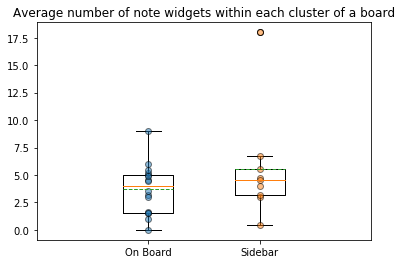

In [69]:
f, ax = plt.subplots()
ax.boxplot(clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWidgetsTotals'].mean(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWidgetsTotals'].mean(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWidgetsTotals'].mean()))], clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWidgetsTotals'].mean(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWidgetsTotals'].mean()))], clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWidgetsTotals'].mean(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Average number of note widgets within each cluster of a board')
plt.show()
aggTotalBoard=aggTotalBoard.join(clusterDf.groupby('boardId')['clusterWidgetsTotals'].mean())

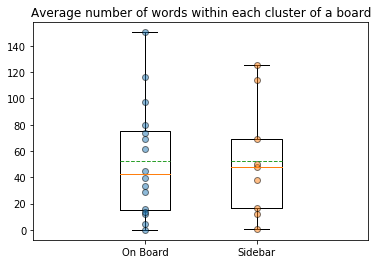

In [70]:
f, ax = plt.subplots()
ax.boxplot(clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWordTotals'].mean(),positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWordTotals'].mean(),positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWordTotals'].mean()))], clusterDf[(clusterDf['studyType']=='On Board')].groupby('boardId')['clusterWordTotals'].mean(), 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWordTotals'].mean()))], clusterDf[(clusterDf['studyType']=='Sidebar')].groupby('boardId')['clusterWordTotals'].mean(), 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('Average number of words within each cluster of a board')
plt.show()
aggTotalBoard=aggTotalBoard.join(clusterDf.groupby('boardId')['clusterWordTotals'].mean())

### Entropy/Branchiness

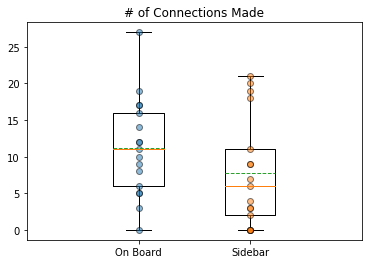

In [71]:
f, ax = plt.subplots()
ax.boxplot(presentBoards[(presentBoards['studyType']=='On Board')]['clusterWidgets'],positions=[1/3], showmeans=True, meanline=True)
ax.boxplot(presentBoards[(presentBoards['studyType']=='Sidebar')]['clusterWidgets'],positions=[2/3], showmeans=True, meanline=True)
ax.plot([1/3  for x in range(len(presentBoards[(presentBoards['studyType']=='On Board')]['clusterWidgets']))], presentBoards[(presentBoards['studyType']=='On Board')]['clusterWidgets'], 'o', markeredgecolor='k', alpha=0.5)
ax.plot([2/3 for x in range(len(presentBoards[(presentBoards['studyType']=='Sidebar')]['clusterWidgets']))], presentBoards[(presentBoards['studyType']=='Sidebar')]['clusterWidgets'], 'o', markeredgecolor='k', alpha=0.5)
plt.xlim([0, 1])
ax.set_xticks([1/3, 2/3])
ax.set_xticklabels(['On Board', 'Sidebar'])
ax.set_title('# of Connections Made')
plt.show()
aggTotalBoard=presentBoards[['boardId','clusterWidgets']].join(aggTotalBoard, on='boardId')

### Finalizing aggTotalBoard

In [72]:
aggTotalBoard=aggTotalBoard.join(browser_df_joined[browser_df_joined['clickedFromMiro']==1].groupby('boardId')['webpagesVisited'].mean(), on='boardId')
aggTotalBoard=aggTotalBoard.rename(columns={'webpagesVisited': 'avgWebpagesVisitedAfterQuery'})
aggTotalBoard

,boardId,clusterWidgets,content,wordTotal,widgetCount,studyType,topicTask,suggestionsOffered,suggestionsQueried,queriesNotFromMiro,...,Cluster,Line,Note,Topic Task,averageDistance,Information Widgets,Sensemaking Widgets,clusterWidgetsTotals,clusterWordTotals,avgWebpagesVisitedAfterQuery
12,o9J_lth3zkI=,9.0,"[{'bounds': {'bottom': -56.95547439637653, 'he...",622,34,On Board,Space Travel,13,7.0,4.0,...,0.0,0.0,7.0,0.0,929.868295,30,9.0,5.000000,150.250000,1.166667
22,o9J_lth9DEA=,2.0,"[{'bounds': {'bottom': 108.36248934295736, 'he...",181,13,Sidebar,Space Travel,6,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,14,2.0,NaN,NaN,NaN
40,o9J_lthxoK8=,0.0,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",181,13,Sidebar,COVID-19,7,1.0,7.0,...,0.0,0.0,1.0,0.0,1463.426123,13,NaN,NaN,NaN,5.000000
73,o9J_lthxoSw=,6.0,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",193,26,On Board,COVID-19,14,6.0,12.0,...,0.0,0.0,6.0,0.0,540.146920,23,7.0,5.166667,61.666667,0.875000
107,o9J_lwMyp0I=,7.0,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",572,27,Sidebar,COVID-19,26,5.0,1.0,...,0.0,0.0,4.0,1.0,736.738448,28,7.0,4.750000,125.250000,1.400000
141,o9J_lwT0kWk=,8.0,"[{'bounds': {'bottom': -419.0857650827397, 'he...",278,8,On Board,Space Travel,22,4.0,2.0,...,0.0,1.0,3.0,0.0,2341.642387,8,15.0,0.000000,0.000000,1.250000
175,o9J_lwT45Gc=,19.0,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",272,27,On Board,COVID-19,16,14.0,6.0,...,0.0,3.0,11.0,0.0,1039.407505,28,25.0,5.428571,69.142857,0.722222
204,o9J_lwT45UE=,4.0,"[{'bounds': {'bottom': -171.79086150615348, 'h...",168,24,Sidebar,COVID-19,12,3.0,3.0,...,2.0,0.0,1.0,0.0,2257.548216,26,8.0,3.000000,38.000000,1.200000
226,o9J_lwTEkh4=,0.0,"[{'bounds': {'bottom': 106.70499538360457, 'he...",3,3,Sidebar,COVID-19,11,5.0,0.0,...,0.0,0.0,5.0,0.0,1744.014473,3,NaN,NaN,NaN,1.000000
278,o9J_lwTEnSI=,10.0,"[{'bounds': {'bottom': 51.55600890140397, 'hei...",320,24,On Board,Space Travel,21,13.0,9.0,...,1.0,2.0,10.0,0.0,846.397504,24,10.0,4.500000,73.750000,1.857143


In [73]:
timediffs = pd.DataFrame(timediffs)
timediffs=timediffs.set_index('boardId')
aggTotalBoard=aggTotalBoard.join(timediffs, on='boardId')
aggTotalBoard

,boardId,clusterWidgets,content,wordTotal,widgetCount,studyType,topicTask,suggestionsOffered,suggestionsQueried,queriesNotFromMiro,...,Line,Note,Topic Task,averageDistance,Information Widgets,Sensemaking Widgets,clusterWidgetsTotals,clusterWordTotals,avgWebpagesVisitedAfterQuery,timeDiffBtwnFirstSuggandNextQuery
12,o9J_lth3zkI=,9.0,"[{'bounds': {'bottom': -56.95547439637653, 'he...",622,34,On Board,Space Travel,13,7.0,4.0,...,0.0,7.0,0.0,929.868295,30,9.0,5.000000,150.250000,1.166667,0 days 00:08:08.627147
22,o9J_lth9DEA=,2.0,"[{'bounds': {'bottom': 108.36248934295736, 'he...",181,13,Sidebar,Space Travel,6,0.0,2.0,...,0.0,0.0,0.0,NaN,14,2.0,NaN,NaN,NaN,NaT
40,o9J_lthxoK8=,0.0,"[{'bounds': {'bottom': -64.5, 'height': 303, '...",181,13,Sidebar,COVID-19,7,1.0,7.0,...,0.0,1.0,0.0,1463.426123,13,NaN,NaN,NaN,5.000000,0 days 00:00:38.239193
73,o9J_lthxoSw=,6.0,"[{'bounds': {'bottom': 1044.3195222955671, 'he...",193,26,On Board,COVID-19,14,6.0,12.0,...,0.0,6.0,0.0,540.146920,23,7.0,5.166667,61.666667,0.875000,0 days 00:00:26.446113
107,o9J_lwMyp0I=,7.0,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",572,27,Sidebar,COVID-19,26,5.0,1.0,...,0.0,4.0,1.0,736.738448,28,7.0,4.750000,125.250000,1.400000,0 days 00:26:43.048953
141,o9J_lwT0kWk=,8.0,"[{'bounds': {'bottom': -419.0857650827397, 'he...",278,8,On Board,Space Travel,22,4.0,2.0,...,1.0,3.0,0.0,2341.642387,8,15.0,0.000000,0.000000,1.250000,0 days 00:00:03.796207
175,o9J_lwT45Gc=,19.0,"[{'bounds': {'bottom': 86.58768042961287, 'hei...",272,27,On Board,COVID-19,16,14.0,6.0,...,3.0,11.0,0.0,1039.407505,28,25.0,5.428571,69.142857,0.722222,0 days 00:01:46.441228
204,o9J_lwT45UE=,4.0,"[{'bounds': {'bottom': -171.79086150615348, 'h...",168,24,Sidebar,COVID-19,12,3.0,3.0,...,0.0,1.0,0.0,2257.548216,26,8.0,3.000000,38.000000,1.200000,0 days 00:03:14.764139
226,o9J_lwTEkh4=,0.0,"[{'bounds': {'bottom': 106.70499538360457, 'he...",3,3,Sidebar,COVID-19,11,5.0,0.0,...,0.0,5.0,0.0,1744.014473,3,NaN,NaN,NaN,1.000000,0 days 00:06:07.517520
278,o9J_lwTEnSI=,10.0,"[{'bounds': {'bottom': 51.55600890140397, 'hei...",320,24,On Board,Space Travel,21,13.0,9.0,...,2.0,10.0,0.0,846.397504,24,10.0,4.500000,73.750000,1.857143,0 days 00:00:11.614301


In [74]:
aggTotalBoard=aggTotalBoard.reset_index(drop=True)
aggTotalBoard = aggTotalBoard.drop('content', axis=1)
aggTotalBoard.to_csv('aggTotals.csv')

In [75]:
aggTotalBoard


,boardId,clusterWidgets,wordTotal,widgetCount,studyType,topicTask,suggestionsOffered,suggestionsQueried,queriesNotFromMiro,queriesFromMiro,...,Line,Note,Topic Task,averageDistance,Information Widgets,Sensemaking Widgets,clusterWidgetsTotals,clusterWordTotals,avgWebpagesVisitedAfterQuery,timeDiffBtwnFirstSuggandNextQuery
0,o9J_lth3zkI=,9.0,622,34,On Board,Space Travel,13,7.0,4.0,12.0,...,0.0,7.0,0.0,929.868295,30,9.0,5.000000,150.250000,1.166667,0 days 00:08:08.627147
1,o9J_lth9DEA=,2.0,181,13,Sidebar,Space Travel,6,0.0,2.0,0.0,...,0.0,0.0,0.0,NaN,14,2.0,NaN,NaN,NaN,NaT
2,o9J_lthxoK8=,0.0,181,13,Sidebar,COVID-19,7,1.0,7.0,1.0,...,0.0,1.0,0.0,1463.426123,13,NaN,NaN,NaN,5.000000,0 days 00:00:38.239193
3,o9J_lthxoSw=,6.0,193,26,On Board,COVID-19,14,6.0,12.0,8.0,...,0.0,6.0,0.0,540.146920,23,7.0,5.166667,61.666667,0.875000,0 days 00:00:26.446113
4,o9J_lwMyp0I=,7.0,572,27,Sidebar,COVID-19,26,5.0,1.0,5.0,...,0.0,4.0,1.0,736.738448,28,7.0,4.750000,125.250000,1.400000,0 days 00:26:43.048953
5,o9J_lwT0kWk=,8.0,278,8,On Board,Space Travel,22,4.0,2.0,4.0,...,1.0,3.0,0.0,2341.642387,8,15.0,0.000000,0.000000,1.250000,0 days 00:00:03.796207
6,o9J_lwT45Gc=,19.0,272,27,On Board,COVID-19,16,14.0,6.0,18.0,...,3.0,11.0,0.0,1039.407505,28,25.0,5.428571,69.142857,0.722222,0 days 00:01:46.441228
7,o9J_lwT45UE=,4.0,168,24,Sidebar,COVID-19,12,3.0,3.0,5.0,...,0.0,1.0,0.0,2257.548216,26,8.0,3.000000,38.000000,1.200000,0 days 00:03:14.764139
8,o9J_lwTEkh4=,0.0,3,3,Sidebar,COVID-19,11,5.0,0.0,5.0,...,0.0,5.0,0.0,1744.014473,3,NaN,NaN,NaN,1.000000,0 days 00:06:07.517520
9,o9J_lwTEnSI=,10.0,320,24,On Board,Space Travel,21,13.0,9.0,14.0,...,2.0,10.0,0.0,846.397504,24,10.0,4.500000,73.750000,1.857143,0 days 00:00:11.614301
